<p style="font-size:25px; color:green; font-weight:bold;">Pre-processing the data for Multimodal movie genre prediction </p>

In [ ]:
# Downloading the dataseet from Kaggle
# !kaggle datasets download -d rounakbanik/the-movies-dataset

In [8]:
# Importing the required imports
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import pandas as pd

In [9]:
# Reading the downloaded data
source_data = pd.read_csv('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/movies_metadata.csv')
pd.set_option('display.max_columns', None)
source_data.head(3)

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_59963/3853392497.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  source_data = pd.read_csv('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [10]:
# getting all the required columns from the source data
subset_data = source_data[['id', 'original_title', 'overview', 'tagline', 'genres', 'budget', 'popularity', 'release_date']]
print("subset_data length is:", len(subset_data))

subset_data length is: 45466


In [11]:
# Taking a look at the subsetted data
subset_data.head()

,id,original_title,overview,tagline,genres,budget,popularity,release_date
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10


In [13]:
# Converting the genre column into a list to find  all the individual genre's count
found_genres = subset_data['genres'].tolist()
found_genres

["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 35, 'name': 'Comedy'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10

In [14]:
genre_per_movie = []
genre_dict = {}

# creating a list of genres that are not commonly used genres
invalid_genres = ['Aniplex', 'BROSTA TV', 'Carousel Productions', 'GoHands', 'Mardock Scramble Production Committee', 
                  'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Sentai Filmworks','Telescene Film Group Productions', 
                  'The Cartel', 'Vision View Entertainment', 'TV Movie', 'Foreign']
for genre in found_genres:
  genre = ast.literal_eval(genre)
  genre_list = []
  for val in genre:
    if val['name'] not in invalid_genres:
      genre_list.append(val['name'])
      if val['name'] in genre_dict:
        genre_dict[val['name']] += 1
      else:
        genre_dict[val['name']] = 1
  genre_per_movie.append(genre_list)
genre_dict = {key:val for key, val in genre_dict.items() if val != 1}
genre_dict

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042}

In [15]:
# Sorting the genre dictionary in ascending order based on the value
genre_dict_sorted = dict(sorted(genre_dict.items(), key=lambda item: item[1]))
genre_dict_sorted

{'Western': 1042,
 'War': 1323,
 'History': 1398,
 'Music': 1598,
 'Animation': 1935,
 'Fantasy': 2313,
 'Mystery': 2467,
 'Family': 2770,
 'Science Fiction': 3049,
 'Adventure': 3496,
 'Documentary': 3932,
 'Crime': 4307,
 'Horror': 4673,
 'Action': 6596,
 'Romance': 6735,
 'Thriller': 7624,
 'Comedy': 13182,
 'Drama': 20265}

In [16]:
# Creating two seperate lists from the dictionary for plotting them on a graph
keys = list(genre_dict_sorted.keys())
values = list(genre_dict_sorted.values())

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_59963/659743114.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


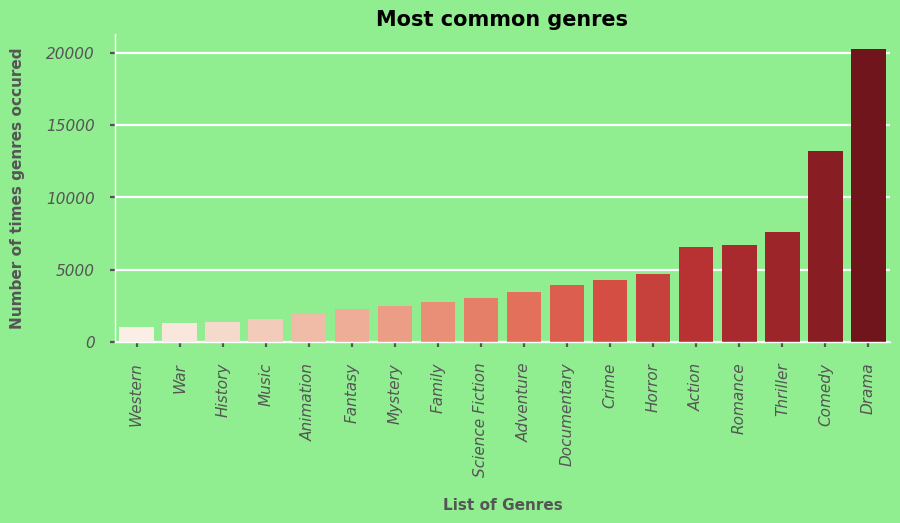

In [17]:
style.use('seaborn-poster')
style.use('ggplot')

fig = plt.figure(figsize=(10, 4))  
fig.patch.set_facecolor('lightgreen')

ax = fig.add_subplot(111)
ax.set_facecolor('lightgreen')

sns.barplot(x=keys, y=values, palette="Reds") 
sns.despine(top=True) 

plt.title("Most common genres", size=15, fontweight='bold')
plt.xlabel('List of Genres', size=11, labelpad=15, fontweight='bold')  
plt.ylabel('Number of times genres occured', size=11, labelpad=15, fontweight='bold') 
plt.xticks(size=11, rotation=90, style='italic')  
plt.yticks(size=11, style='italic')  

plt.show()  

In [18]:
# Inserting the genre list to the source data dataframe
subset_data['genre_list'] = genre_per_movie
subset_data.head()     

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_59963/1794152178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['genre_list'] = genre_per_movie


,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_list
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30,"[Animation, Comedy, Family]"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22,"[Romance, Comedy]"
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy]


In [23]:
subset_data

,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_list
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30,"[Animation, Comedy, Family]"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22,"[Romance, Comedy]"
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy]
...,...,...,...,...,...,...,...,...,...
45461,439050,رگ خواب,Rising and falling between a man and woman.,Rising and falling between a man and woman,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",0,0.072051,NaN,"[Drama, Family]"
45462,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.178241,2011-11-17,[Drama]
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona...",A deadly game of wits.,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",0,0.903007,2003-08-01,"[Action, Drama, Thriller]"
45464,227506,Satana likuyushchiy,"In a small town live two brothers, one a minis...",NaN,[],0,0.003503,1917-10-21,[]


In [ ]:
# Counting the non-empty genre_list 
subset_data = subset_data[subset_data['genre_list'].map(lambda d: len(d)) > 0]
print("Counting the non-empty genre_list values:", len(subset_data))

Counting the non-empty genre_list values: 42995


In [ ]:
empty_count = 0
for genre in genre_per_movie:
  if not len(genre):
    empty_count += 1
print("Counting the total empty count in genre_list:", empty_count)

Counting the total empty count in genre_list: 2471


<p style="font-size:25px; color:green; font-weight:bold;"> Using TMDb API to download the movie posters </p>

In [ ]:
!pip install tmdbv3api

from bs4 import BeautifulSoup
import os    
import requests
from tmdbv3api import Movie
from tmdbv3api import TMDb

# Instalising the TMDb API
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'

In [ ]:
# # Creating a function to download the posters 
# def get_movie_posters(url, name):
#   try:
#     baseurl = 'http://image.tmdb.org/t/p/w185'
#     link = baseurl + url
#     img = requests.get(link).content
#     name = name.replace('/', '_')
#     file_name = str(name) + ".jpg"
#     path = os.path.join('C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters', file_name)
#     with open(path, 'wb') as handler:
#       handler.write(img)
#     return path
#   except Exception as e:
#     print('[ERROR]', str(e))
#     return "Error"

# poster_paths = []
# movie = Movie()

# i = 1
# for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
#   m = movie.details(int(id))
#   print('Downloading:', name, "i", i)
#   try:
#     poster_paths.append(get_movie_posters(m.poster_path, name))
#   except Exception as e:
#     print('[ERROR]', str(e))
#     poster_paths.append("API Error")
#   i += 1

# print(len(poster_paths))    

In [ ]:
# import os
# from tmdbv3api import TMDb, Movie

# # Function to download posters (dummy implementation)
# def get_posters(base_url, poster_path, name):
#     import requests
#     temp = name.replace('/', '_')
#     file_name = f"{temp}.jpg"
#     path = os.path.join(download_path, file_name)
    
#     if os.path.exists(path):
#         return path  # Skip download if file already exists

#     full_url = base_url + poster_path
#     response = requests.get(full_url)
#     if response.status_code == 200:
#         with open(path, 'wb') as f:
#             f.write(response.content)
#         return path
#     else:
#         raise Exception(f"Failed to download poster for {name}")

# # Initialize TMDb and Movie objects
# tmdb = TMDb()
# tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
# movie = Movie()

# # Base URL for TMDb images
# base_url = "http://image.tmdb.org/t/p/original"

# Track existing downloaded files
# download_path = 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters'
# downloaded_files = {name.replace('/', '_') + ".jpg" for name in os.listdir(download_path)}

# poster_paths = []

# i = 1
# for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
#     temp = name.replace('/', '_')
#     file_name = f"{temp}.jpg"

#     if file_name in downloaded_files:
#         print(f"Skipping {name}, already downloaded.")
#         poster_paths.append(os.path.join(download_path, file_name))
#         continue

#     try:
#         m = movie.details(int(id))
#         print('Downloading:', name, "i", i)
#         poster_path = get_posters(base_url, m.poster_path, name)
#         poster_paths.append(poster_path)
#     except Exception as e:
#         error_message = str(e)
#         if "The resource you requested could not be found" in error_message:
#             print('[TMDb ERROR]', error_message)
#             poster_paths.append("TMDb Error")
#         else:
#             print('[ERROR]', error_message)
#             poster_paths.append("API Error")

#     i += 1
# print(len(poster_paths))


In [ ]:
import os
from tmdbv3api import TMDb, Movie
import requests

# Function to download posters
def get_posters(base_url, poster_path, name, download_path):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"
    path = os.path.join(download_path, file_name)
    
    if os.path.exists(path):
        return None  # Return None if the file already exists

    full_url = base_url + poster_path
    response = requests.get(full_url)
    if response.status_code == 200:
        with open(path, 'wb') as f:
            f.write(response.content)
        return path
    else:
        raise Exception(f"Failed to download poster for {name}")

# Initialize TMDb and Movie objects
tmdb = TMDb()
tmdb.api_key = 'a5cfc2b29bcfc59caa68e5e969183a49'
movie = Movie()

# Base URL for TMDb images
base_url = "http://image.tmdb.org/t/p/original"

# Path to the directory where posters will be downloaded
download_path = 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters'

# Track existing downloaded files
downloaded_files = {file_name for file_name in os.listdir(download_path)}

poster_paths = []

i = 1
for id, name in zip(subset_data['id'].tolist(), subset_data['original_title'].tolist()):
    temp = name.replace('/', '_')
    file_name = f"{temp}.jpg"

    if file_name not in downloaded_files:
        # print(f"Skipping {name}, already downloaded.")
        # continue  # Skip downloading if already downloaded

        try:
            m = movie.details(int(id))
            print('Downloading:', name, "i", i)
            poster_path = get_posters(base_url, m.poster_path, name, download_path)
            if poster_path:  # Only add to poster_paths if the poster was successfully downloaded
                poster_paths.append(poster_path)
                downloaded_files.add(file_name)  # Add newly downloaded file to the set
        except Exception as e:
            error_message = str(e)
            if "The resource you requested could not be found" in error_message:
                print('[TMDb ERROR]', error_message)
            else:
                print('[ERROR]', error_message)

    i += 1
print(len(poster_paths))


Downloading: Dracula: Dead and Loving It i 12
Downloading: Ace Ventura: When Nature Calls i 19
Downloading: Across the Sea of Time i 37
[ERROR] can only concatenate str (not "NoneType") to str
Downloading: Lawnmower Man 2: Beyond Cyberspace i 65
Downloading: Heidi Fleiss: Hollywood Madam i 96
Downloading: Die Hard: With a Vengeance i 159
Downloading: Mighty Morphin Power Rangers: The Movie i 175
Downloading: Under Siege 2: Dark Territory i 198
Downloading: Far from Home: The Adventures of Yellow Dog i 231
Downloading: Gumby: The Movie i 237
Downloading: Poison Ivy II: Lily i 284
Downloading: Trois couleurs : Rouge i 299
Downloading: Trois couleurs : Bleu i 300
Downloading: Trois couleurs : Blanc i 301
Downloading: Tales from the Crypt: Demon Knight i 320
Downloading: Star Trek: Generations i 321
Downloading: Ace Ventura: Pet Detective i 336
Downloading: Die Macht der Bilder: Leni Riefenstahl i 355
Downloading: The Naked Gun 33⅓: The Final Insult i 362
Downloading: Boys Life: Three Stor

In [ ]:
poster_paths

['C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Toy Story.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Jumanji.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Grumpier Old Men.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Waiting to Exhale.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Father of the Bride Part II.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Heat.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Sabrina.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Tom and Huck.jpg',
 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_posters\\Sudden D

In [ ]:
# Importing all the downloaded images
image_downloaded_path = 'C:/Users/Lenovo/IdeaProjects/Data_Science_Project/data_science_project/downloaded_poster_new'
poster_paths = [os.path.join(image_downloaded_path, f) for f in os.listdir(image_downloaded_path)]

# Creating new column for posters
subset_data['poster_paths'] = poster_paths

In [ ]:
print(len(subset_data))
print(len(subset_data[(subset_data['poster_paths'] == "API Error") | (subset_data['poster_paths'] == "Error")]))

In [ ]:
# Filtering out the poster paths which are not downaloaded because of API Error
subset_data = subset_data[subset_data['poster_paths'] != "API Error"]
print(len(subset_data))

# Filtering out the poster paths which are not downaloaded because of Error
subset_data = subset_data[subset_data['poster_paths'] != "Error"]
print(len(subset_data))

In [24]:
subset_data.head()

,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_list
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30,"[Animation, Comedy, Family]"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22,"[Romance, Comedy]"
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy]


In [ ]:
# Saving the processed dataframe as a csv
subset_data.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/dataset_mod.csv")

In [19]:
data_with_genreAndPosters = pd.read_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/dataset_mod.csv")

In [20]:
data_with_genreAndPosters_subset = data_with_genreAndPosters[['id', 'original_title', 'overview', 'genres', 'genre_list', 'poster_paths']]
data_with_genreAndPosters_subset

,id,original_title,overview,genres,genre_list,poster_paths
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","['Animation', 'Comedy', 'Family']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","['Adventure', 'Fantasy', 'Family']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","['Romance', 'Comedy']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","['Comedy', 'Drama', 'Romance']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",['Comedy'],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
...,...,...,...,...,...,...
42990,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,"[{'id': 878, 'name': 'Science Fiction'}]",['Science Fiction'],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
42991,30840,Robin Hood,"Yet another version of the classic epic, with ...","[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","['Drama', 'Action', 'Romance']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
42992,439050,رگ خواب,Rising and falling between a man and woman.,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","['Drama', 'Family']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
42993,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,"[{'id': 18, 'name': 'Drama'}]",['Drama'],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...


In [21]:
subset_data

,id,original_title,overview,tagline,genres,budget,popularity,release_date,genre_list
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30,"[Animation, Comedy, Family]"
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22,"[Romance, Comedy]"
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy]
...,...,...,...,...,...,...,...,...,...
45461,439050,رگ خواب,Rising and falling between a man and woman.,Rising and falling between a man and woman,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",0,0.072051,NaN,"[Drama, Family]"
45462,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.178241,2011-11-17,[Drama]
45463,67758,Betrayal,"When one of her hits goes wrong, a professiona...",A deadly game of wits.,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",0,0.903007,2003-08-01,"[Action, Drama, Thriller]"
45464,227506,Satana likuyushchiy,"In a small town live two brothers, one a minis...",NaN,[],0,0.003503,1917-10-21,[]


In [22]:
# Ensure the 'id' columns in both DataFrames are of type string
subset_data['id'] = subset_data['id'].astype(str)
data_with_genreAndPosters_subset['id'] = data_with_genreAndPosters_subset['id'].astype(str)

# Perform the merge
merged_data = subset_data.merge(data_with_genreAndPosters_subset, on=['id', 'original_title', 'overview'], how='inner')

merged_data

/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_59963/763792416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['id'] = subset_data['id'].astype(str)
/var/folders/v7/5sslmpnj7h19d81gp7jnvxcm0000gp/T/ipykernel_59963/763792416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_genreAndPosters_subset['id'] = data_with_genreAndPosters_subset['id'].astype(str)


,id,original_title,overview,tagline,genres_x,budget,popularity,release_date,genre_list_x,genres_y,genre_list_y,poster_paths
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,21.946943,1995-10-30,"[Animation, Comedy, Family]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","['Animation', 'Comedy', 'Family']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,17.015539,1995-12-15,"[Adventure, Fantasy, Family]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","['Adventure', 'Fantasy', 'Family']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,11.7129,1995-12-22,"[Romance, Comedy]","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","['Romance', 'Comedy']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,3.859495,1995-12-22,"[Comedy, Drama, Romance]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","['Comedy', 'Drama', 'Romance']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",0,8.387519,1995-02-10,[Comedy],"[{'id': 35, 'name': 'Comedy'}]",['Comedy'],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
...,...,...,...,...,...,...,...,...,...,...,...,...
43052,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",0,0.661558,1995-01-01,[Science Fiction],"[{'id': 878, 'name': 'Science Fiction'}]",['Science Fiction'],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43053,30840,Robin Hood,"Yet another version of the classic epic, with ...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0,5.683753,1991-05-13,"[Drama, Action, Romance]","[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","['Drama', 'Action', 'Romance']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43054,439050,رگ خواب,Rising and falling between a man and woman.,Rising and falling between a man and woman,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",0,0.072051,NaN,"[Drama, Family]","[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","['Drama', 'Family']",/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43055,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,NaN,"[{'id': 18, 'name': 'Drama'}]",0,0.178241,2011-11-17,[Drama],"[{'id': 18, 'name': 'Drama'}]",['Drama'],/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...


In [23]:
merged_subset_data = merged_data[['id', 'original_title', 'overview', 'tagline', 'genres_x', 'budget','popularity', 'release_date', 'genre_list_x', 'poster_paths']]
merged_subset_data = merged_subset_data.rename(columns={'genres_x':'genres',
                                    'genre_list_x':'genre_list'})
final_merged_subset_data = merged_subset_data[['id', 'original_title', 'overview', 'tagline', 'genres', 'genre_list', 'budget', 'popularity', 'release_date', 'poster_paths']]

In [24]:
final_merged_subset_data

,id,original_title,overview,tagline,genres,genre_list,budget,popularity,release_date,poster_paths
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]",30000000,21.946943,1995-10-30,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]",65000000,17.015539,1995-12-15,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]",0,11.7129,1995-12-22,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]",16000000,3.859495,1995-12-22,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,"[{'id': 35, 'name': 'Comedy'}]",[Comedy],0,8.387519,1995-02-10,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
...,...,...,...,...,...,...,...,...,...,...
43052,222848,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,NaN,"[{'id': 878, 'name': 'Science Fiction'}]",[Science Fiction],0,0.661558,1995-01-01,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43053,30840,Robin Hood,"Yet another version of the classic epic, with ...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[Drama, Action, Romance]",0,5.683753,1991-05-13,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43054,439050,رگ خواب,Rising and falling between a man and woman.,Rising and falling between a man and woman,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...","[Drama, Family]",0,0.072051,NaN,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...
43055,111109,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,NaN,"[{'id': 18, 'name': 'Drama'}]",[Drama],0,0.178241,2011-11-17,/Users/ajayrahulraja/Desktop/ARR/Hertfordshire...


In [25]:
# Saving the processed dataframe as a csv
final_merged_subset_data.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/dataset_mod_merge.csv", index=False)

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_merged_subset_data, test_size=0.2)
train, val = train_test_split(train, test_size=0.1)
print(type(train), type(test), type(val))

val.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/val_data.csv")
test.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/test_data.csv")
train.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/train_data.csv")

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [27]:
import cv2
import numpy as np  
import pandas as pd
from PIL import Image 

def resize_img(path):
  try:
    img = cv2.imread(path)
    img = cv2.resize(img, (75, 115))
    img = img.astype(np.float32)/255
    return img
  except Exception as e:
    print(str(e))
    return None

In [28]:
val = pd.read_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/val_data.csv")
test = pd.read_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/test_data.csv")
train = pd.read_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/train_data.csv")

In [29]:
pd.set_option('display.max_colwidth', None)
val['poster_paths']

0                                  /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scanner Cop.jpg
1                                       /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brazil.jpg
2                                  /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Border Feud.jpg
3                                 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/丹下左膳餘話 百萬兩の壺.jpg
4                        /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tom, Dick and Harriet.jpg
                                                                      ...                                                                
3440                      /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bill Burr: Let It Go.jpg
3441                        /Users

In [30]:
val_imgs = []
i = 0
for index, row in val.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    val_imgs.append(img)
  else:
    val = val.drop(index)
    print("Dropping row:", index, "Length:", len(val))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scanner Cop.jpg


[ WARN:0@7.121] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crisis in Six Scenes.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.167] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kickassia.jpg'): can't open/read file: check file path/integrity
[ WARN:0@7.206] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Misconception.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 56 Length: 3444
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 64 Length: 3443
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 71 Length: 3442
Processing i: 100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dave Attell's Insomniac Tour: Uncensored!.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty

[ WARN:0@7.695] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Space.jpg'): can't open/read file: check file path/integrity
[ WARN:0@8.461] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Power_Rangers.jpg'): can't open/read file: check file path/integrity
[ WARN:0@8.486] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Getting Back to Abnormal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 187 Length: 3440
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 196 Length: 3439
Processing i: 200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alice in den Städten.jpg


[ WARN:0@9.037] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kristus elab Siberis.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9.038] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/C'est l'aviron.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 258 Length: 3438
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 259 Length: 3437
Processing i: 300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Flaskepost fra P.jpg
Processing i: 400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Atomic States Of America.jpg


[ WARN:0@10.797] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brother Minister: The Assassination of Malcolm X.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 426 Length: 3436
Processing i: 500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shorts.jpg


[ WARN:0@11.887] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/¡Qué hacer!.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 524 Length: 3435


[ WARN:0@12.339] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Trans-Atlantic Mystery.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 566 Length: 3434
Processing i: 600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Roaring Twenties.jpg


[ WARN:0@12.966] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shaka Zulu.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 625 Length: 3433
Processing i: 700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/신라의 달밤.jpg


[ WARN:0@13.789] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Farmer's Wife.jpg'): can't open/read file: check file path/integrity
[ WARN:0@13.904] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Roosevelts: An Intimate History.jpg'): can't open/read file: check file path/integrity
[ WARN:0@13.964] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Moja krew.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 716 Length: 3432
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 726 Length: 3431
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 732 Length: 3430


[ WARN:0@14.484] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Disaster Playground.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 777 Length: 3429
Processing i: 800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/At Close Range.jpg


[ WARN:0@15.240] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pilot Error.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 861 Length: 3428
Processing i: 900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/さらば夏の光.jpg


[ WARN:0@16.105] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Break Free.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 935 Length: 3427


[ WARN:0@16.677] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/New York Lightboard Record.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 989 Length: 3426
Processing i: 1000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Barber.jpg


[ WARN:0@17.442] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Reflection.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1084 Length: 3425
Processing i: 1100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Feng ai.jpg
Processing i: 1200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dog Soldiers.jpg
Processing i: 1300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Remember the Titans.jpg


[ WARN:0@19.839] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Höhere Gewalt.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1339 Length: 3424
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1379 Length: 3423
Processing i: 1400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ギララの逆襲　洞爺湖サミット危機一発.jpg


[ WARN:0@20.191] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Deep Hearts.jpg'): can't open/read file: check file path/integrity
[ WARN:0@20.392] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Maigrets Night at the Crossroads.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1404 Length: 3422


[ WARN:0@20.693] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Primer intonatsii.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1432 Length: 3421


[ WARN:0@20.911] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Asylum of Darkness.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1452 Length: 3420
Processing i: 1500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nothing Personal.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1513 Length: 3419


[ WARN:0@21.452] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/What Is This Film Called Love?.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21.666] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Comanche Moon.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1527 Length: 3418


[ WARN:0@21.925] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Serial Killer Culture.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1544 Length: 3417


[ WARN:0@22.248] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nye scener fra Amerika.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22.342] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rolling.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1589 Length: 3416
Processing i: 1600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Little Black Spiders.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1605 Length: 3415
Processing i: 1700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Horse Feathers.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1713 Length: 3414


[ WARN:0@23.321] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shock and Awe: The Story of Electricity.jpg'): can't open/read file: check file path/integrity
[ WARN:0@23.972] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Planet Earth II.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1780 Length: 3413
Processing i: 1800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Still Breathing.jpg


[ WARN:0@25.200] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Carman: The Champion.jpg'): can't open/read file: check file path/integrity
[ WARN:0@25.380] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Homemade Hillbilly Jam.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1892 Length: 3412
Processing i: 1900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Freshman.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1919 Length: 3411


[ WARN:0@26.010] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lotto Land.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1978 Length: 3410
Processing i: 2000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Black Water.jpg


[ WARN:0@26.451] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/UltraMarathon Man: 50 Marathons, 50 States, 50 Days.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2029 Length: 3409


[ WARN:0@26.916] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Big Muddy.jpg'): can't open/read file: check file path/integrity
[ WARN:0@26.941] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Find Love.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2082 Length: 3408
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2090 Length: 3407
Processing i: 2100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ngai sing.jpg


[ WARN:0@27.366] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jude the Obscure.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2142 Length: 3406
Processing i: 2200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Buried Alive II.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2224 Length: 3405


[ WARN:0@28.197] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Life, Love & Celluloid.jpg'): can't open/read file: check file path/integrity


Processing i: 2300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jean Ziegler, l'optimisme de la volonté.jpg


[ WARN:0@29.583] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Louis Theroux: By Reason of Insanity.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2382 Length: 3404
Processing i: 2400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ved verdens ende.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2444 Length: 3403


[ WARN:0@30.222] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frank and the Wondercat.jpg'): can't open/read file: check file path/integrity


Processing i: 2500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/天地無用!真夏のイブ.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2515 Length: 3402


[ WARN:0@30.946] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trouw met mij.jpg'): can't open/read file: check file path/integrity
[ WARN:0@31.256] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A History of Horror with Mark Gatiss.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2544 Length: 3401


[ WARN:0@31.649] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Halo 4: Forward Unto Dawn.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2574 Length: 3400
Processing i: 2600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Myq Kaplan: Small, Dork and Handsome.jpg


[ WARN:0@32.464] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Division: Agent Origins.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2643 Length: 3399
Processing i: 2700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/David Cross: Making America Great Again.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2725 Length: 3398


[ WARN:0@33.266] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frauen über R. W. Fassbinder.jpg'): can't open/read file: check file path/integrity
[ WARN:0@33.805] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/If Tomorrow Comes.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2791 Length: 3397
Processing i: 2800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Las Vegas Story.jpg
Processing i: 2900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Forever, Darling.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2949 Length: 3396


[ WARN:0@35.503] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/教科書にないッ！.jpg'): can't open/read file: check file path/integrity
[ WARN:0@35.718] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect 5: Errors of Judgement.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2981 Length: 3395
Processing i: 3000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Under Siege 2: Dark Territory.jpg
Processing i: 3100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Joshua Tree, 1951: A Portrait of James Dean.jpg


[ WARN:0@37.427] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Like Father, Like Son.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3152 Length: 3394
Processing i: 3200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Slow Southern Steel.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3200 Length: 3393


[ WARN:0@37.851] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Slow Southern Steel.jpg'): can't open/read file: check file path/integrity
[ WARN:0@38.737] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Impossible Convicts.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3291 Length: 3392
Processing i: 3300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Seymour: An Introduction.jpg


[ WARN:0@39.188] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bloody Mondays & Strawberry Pies.jpg'): can't open/read file: check file path/integrity
[ WARN:0@39.284] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Olive Kitteridge.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3342 Length: 3391
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3353 Length: 3390
Processing i: 3400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scooby-Doo! Pirates Ahoy!.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3443 Length: 3389


[ WARN:0@40.264] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dead Set.jpg'): can't open/read file: check file path/integrity


In [31]:
assert len(val) == len(val_imgs)

In [32]:
val_np_imgs = np.array(val_imgs)
val_np_imgs.shape

(3389, 115, 75, 3)

In [33]:
val.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project//val_data.csv")

In [34]:
import pickle
with open('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/val_np_img_norm','wb') as f: pickle.dump(val_np_imgs, f)

In [35]:
test_imgs = []
i = 0
for index, row in test.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    test_imgs.append(img)
  else:
    test = test.drop(index)
    print("Dropping row:", index, "Length:", len(test))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Halloween.jpg


[ WARN:0@41.446] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thomas Pynchon: A Journey Into the Mind of P..jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 73 Length: 8611
Processing i: 100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Challenge.jpg


[ WARN:0@42.292] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Soupçons.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 169 Length: 8610


[ WARN:0@42.525] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wanda Sykes: Sick and Tired.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 194 Length: 8609
Processing i: 200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Narco Cultura.jpg


[ WARN:0@42.963] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ich Chef, Du Turnschuh.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 233 Length: 8608


[ WARN:0@43.485] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/श्वास.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 276 Length: 8607
Processing i: 300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Un moment d'égarement.jpg
Processing i: 400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cinema Komunisto.jpg
Processing i: 500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die Ehe der Maria Braun.jpg


[ WARN:0@46.048] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kevin.jpg'): can't open/read file: check file path/integrity
[ WARN:0@46.128] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/American Mullet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 522 Length: 8606
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 537 Length: 8605
Processing i: 600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lusty Men.jpg
Processing i: 700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ghostbusters.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 711 Length: 8604


[ WARN:0@47.883] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hotel Room.jpg'): can't open/read file: check file path/integrity
[ WARN:0@48.070] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Medora.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 733 Length: 8603
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 739 Length: 8602


[ WARN:0@48.107] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Secret of Crickley Hall.jpg'): can't open/read file: check file path/integrity
[ WARN:0@48.304] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frontier.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 760 Length: 8601
Processing i: 800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/L'arrivée d'un train en gare de La Ciotat.jpg


[ WARN:0@49.773] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Maigret Sets a Trap.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 894 Length: 8600
Processing i: 900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/岳 みんなの山.jpg


[ WARN:0@50.592] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Drei Sterne - Die Köche und die Sterne.jpg'): can't open/read file: check file path/integrity
[ WARN:0@50.629] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Diamond Cartel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 974 Length: 8599
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 982 Length: 8598
Processing i: 1000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ticky Tacky.jpg
Processing i: 1100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/36 Fillette.jpg


[ WARN:0@52.129] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Citizen King.jpg'): can't open/read file: check file path/integrity
[ WARN:0@52.277] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tom, Dick And Harry.jpg'): can't open/read file: check file path/integrity
[ WARN:0@52.315] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Life Coach.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1125 Length: 8597
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1138 Length: 8596
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1144 Length: 8595
Processing i: 1200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Freedom Strike.jpg


[ WARN:0@53.327] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Come Together.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1244 Length: 8594
Processing i: 1300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sandy Wexler.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1326 Length: 8593


[ WARN:0@54.138] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trophy Kids.jpg'): can't open/read file: check file path/integrity
[ WARN:0@54.508] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Tommyknockers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1362 Length: 8592
Processing i: 1400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Firaaq.jpg
Processing i: 1500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sudden Danger.jpg


[ WARN:0@56.548] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I, Claudius.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1572 Length: 8591
Processing i: 1600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Envoyés très spéciaux.jpg


[ WARN:0@57.276] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost Room.jpg'): can't open/read file: check file path/integrity
[ WARN:0@57.358] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Return to the Philippines, the Leon Cooper Story.jpg'): can't open/read file: check file path/integrity
[ WARN:0@57.395] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Independents.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1654 Length: 8590
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1659 Length: 8589
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1663 Length: 8588


[ WARN:0@57.505] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Wake in Providence.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1670 Length: 8587
Processing i: 1700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lord Jim.jpg


[ WARN:0@58.720] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Identical.jpg'): can't open/read file: check file path/integrity
[ WARN:0@58.845] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Neshoba.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1795 Length: 8586
Processing i: 1800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Amator.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1811 Length: 8585
Processing i: 1900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Plots with a View.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1916 Length: 8584


[ WARN:0@59.735] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Win_Win.jpg'): can't open/read file: check file path/integrity
[ WARN:0@60.429] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Flower & Garnet.jpg'): can't open/read file: check file path/integrity
[ WARN:0@60.567] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Story of Film: An Odyssey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1990 Length: 8583
Processing i: 2000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Карлсон вернулся.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2001 Length: 8582


[ WARN:0@61.093] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hitchcocked!.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2053 Length: 8581
Processing i: 2100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Les temps morts.jpg


[ WARN:0@61.832] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Residue.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2131 Length: 8580


[ WARN:0@62.182] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Header.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2159 Length: 8579
Processing i: 2200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La blonde aux seins nus.jpg


[ WARN:0@63.032] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Salad Fingers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2242 Length: 8578


[ WARN:0@63.382] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/What Would Jesus Buy?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2275 Length: 8577
Processing i: 2300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Secrets.jpg


[ WARN:0@63.768] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nantucket Film Festival's Comedy Roundtable.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2321 Length: 8576


[ WARN:0@64.012] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect: Inner Circles.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2344 Length: 8575
Processing i: 2400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tarik El Hob.jpg


[ WARN:0@64.973] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jedi Junior High.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2464 Length: 8574
Processing i: 2500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gypo.jpg


[ WARN:0@65.668] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elizabeth I.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2532 Length: 8573


[ WARN:0@66.011] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chain Camera.jpg'): can't open/read file: check file path/integrity
[ WARN:0@66.041] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Evaporating Borders.jpg'): can't open/read file: check file path/integrity
[ WARN:0@66.116] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Buster Keaton: A Hard Act to Follow.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2572 Length: 8572
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2578 Length: 8571
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2589 Length: 8570
Processing i: 2600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/River.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Drop

[ WARN:0@66.375] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/V: The Final Battle.jpg'): can't open/read file: check file path/integrity
[ WARN:0@66.399] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der Freund.jpg'): can't open/read file: check file path/integrity


Processing i: 2700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ali Baba Goes To Town.jpg


[ WARN:0@67.529] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Deadly Renovations.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2719 Length: 8567


[ WARN:0@67.890] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Crisis of Civilization.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2748 Length: 8566


[ WARN:0@68.109] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Wildman of Kentucky: The Mystery of Panther Rock.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2770 Length: 8565
Processing i: 2800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Leonie.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2802 Length: 8564
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2813 Length: 8563


[ WARN:0@68.382] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Our RoboCop Remake.jpg'): can't open/read file: check file path/integrity
[ WARN:0@68.436] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Payback: Straight Up.jpg'): can't open/read file: check file path/integrity


Processing i: 2900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Smosh: The Movie.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2907 Length: 8562


[ WARN:0@69.406] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Svens Geheimnis.jpg'): can't open/read file: check file path/integrity
[ WARN:0@70.335] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sun Kissed.jpg'): can't open/read file: check file path/integrity
[ WARN:0@70.509] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Henry Miller Asleep & Awake.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2988 Length: 8561
Processing i: 3000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/15: The Movie.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3011 Length: 8560


[ WARN:0@70.610] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kony 2012.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3020 Length: 8559
Processing i: 3100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sex and Death 101.jpg


[ WARN:0@72.178] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Empty Mirror.jpg'): can't open/read file: check file path/integrity
[ WARN:0@72.295] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect 3.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3177 Length: 8558
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3188 Length: 8557
Processing i: 3200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Never So Few.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3265 Length: 8556


[ WARN:0@73.116] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Fourth Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity


Processing i: 3300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cowboy Canteen.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3312 Length: 8555


[ WARN:0@73.589] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cowboy del Amor.jpg'): can't open/read file: check file path/integrity
[ WARN:0@74.519] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Can Mr. Smith Get to Washington Anymore?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3391 Length: 8554
Processing i: 3400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mes chères études.jpg


[ WARN:0@74.986] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Welcome to Australia.jpg'): can't open/read file: check file path/integrity
[ WARN:0@75.183] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Likainen pommi.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3433 Length: 8553
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3450 Length: 8552
Processing i: 3500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Paradise Suite.jpg


[ WARN:0@75.891] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mega Man.jpg'): can't open/read file: check file path/integrity
[ WARN:0@75.914] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/BookWars.jpg'): can't open/read file: check file path/integrity
[ WARN:0@75.915] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kahlekuningas.jpg'): can't open/read file: check file path/integrity
[ WARN:0@76.079] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/X: Past Is Present.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3532 Length: 8551
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3535 Length: 8550
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3536 Length: 8549
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3570 Length: 8548


[ WARN:0@76.248] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Je Vous Aime.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3585 Length: 8547
Processing i: 3600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Beer Wars.jpg


[ WARN:0@76.939] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dust Bowl.jpg'): can't open/read file: check file path/integrity
[ WARN:0@76.986] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hey, Boo: Harper Lee & To Kill a Mockingbird.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3651 Length: 8546
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3659 Length: 8545
Processing i: 3700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Wee Man.jpg


[ WARN:0@77.815] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lagodna.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3759 Length: 8544
Processing i: 3800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/God Told Me To.jpg


[ WARN:0@78.494] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Zeitoun.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3831 Length: 8543


[ WARN:0@78.789] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tout près des étoiles: Les danseurs de l'Opéra de Paris.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3865 Length: 8542
Processing i: 3900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Player.jpg


[ WARN:0@79.914] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/With Friends Like These....jpg'): can't open/read file: check file path/integrity
[ WARN:0@80.090] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Radical Grace.jpg'): can't open/read file: check file path/integrity
[ WARN:0@80.105] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dresden.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3989 Length: 8541
Processing i: 4000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/東京喰種 トーキョーグール.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4006 Length: 8540
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4011 Length: 8539


[ WARN:0@80.130] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Fire Next Time.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4014 Length: 8538
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4047 Length: 8537


[ WARN:0@80.421] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Haack ...The King of Techno.jpg'): can't open/read file: check file path/integrity
[ WARN:0@80.838] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/This American Journey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4085 Length: 8536
Processing i: 4100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Bullet for Joey.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4113 Length: 8535


[ WARN:0@81.141] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Roller Skate Craze.jpg'): can't open/read file: check file path/integrity
[ WARN:0@81.400] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Weekend of a Champion.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4150 Length: 8534


[ WARN:0@81.763] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Star Trek: Of Gods And Men.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4198 Length: 8533
Processing i: 4200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/London in the Raw.jpg


[ WARN:0@82.105] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Severed Footage.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4229 Length: 8532
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4285 Length: 8531


[ WARN:0@82.757] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/All Watched Over by Machines of Loving Grace.jpg'): can't open/read file: check file path/integrity


Processing i: 4300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Witches.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4306 Length: 8530


[ WARN:0@83.007] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Portal.jpg'): can't open/read file: check file path/integrity
[ WARN:0@83.664] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The True Meaning of Pictures: Shelby Lee Adams' Appalachia.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4378 Length: 8529
Processing i: 4400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Pee-Wee Herman Show on Broadway.jpg


[ WARN:0@84.742] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mumia Abu-Jamal: A Case for Reasonable Doubt?.jpg'): can't open/read file: check file path/integrity
[ WARN:0@84.882] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/American Sharia.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4490 Length: 8528
Processing i: 4500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Death Ship.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4511 Length: 8527


[ WARN:0@85.178] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/2AM: The Smiling Man.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4542 Length: 8526


[ WARN:0@85.621] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Primary Instinct.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4581 Length: 8525
Processing i: 4600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Mighty.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4696 Length: 8524
Processing i: 4700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Evil in Us.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4715 Length: 8523


[ WARN:0@86.506] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Redemption of General Butt Naked.jpg'): can't open/read file: check file path/integrity
[ WARN:0@86.689] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rubber Johnny.jpg'): can't open/read file: check file path/integrity
[ WARN:0@86.922] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Apa khabar orang kampung.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4742 Length: 8522
Processing i: 4800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/アントキノイノチ.jpg
Processing i: 4900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Danish Girl.jpg
Processing i: 5000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Chicago 8.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5016 Length: 8521


[ WARN:0@89.322] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elon Gold: Chosen and Taken.jpg'): can't open/read file: check file path/integrity
[ WARN:0@89.378] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Secrets of a Married Man.jpg'): can't open/read file: check file path/integrity
[ WARN:0@89.460] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Merlin's Apprentice.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5024 Length: 8520
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5032 Length: 8519
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5046 Length: 8518


[ WARN:0@89.558] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Unsere Mütter, unsere Väter.jpg'): can't open/read file: check file path/integrity
[ WARN:0@89.642] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Very Social Secretary.jpg'): can't open/read file: check file path/integrity
[ WARN:0@89.666] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tarda estate.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5055 Length: 8517
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5058 Length: 8516
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5074 Length: 8515


[ WARN:0@89.803] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Secret Life of Marilyn Monroe.jpg'): can't open/read file: check file path/integrity


Processing i: 5100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nordwand.jpg


[ WARN:0@90.283] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Nazis - A Warning From History.jpg'): can't open/read file: check file path/integrity
[ WARN:0@90.411] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Homestretch.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5136 Length: 8514
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5150 Length: 8513
Processing i: 5200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Secret Passage.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5201 Length: 8512
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resi

[ WARN:0@90.958] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/12 стульев.jpg'): can't open/read file: check file path/integrity
[ WARN:0@91.155] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jam.jpg'): can't open/read file: check file path/integrity


Dropping row: 5219 Length: 8511
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5282 Length: 8510
Processing i: 5300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gun Hill Road.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5303 Length: 8509


[ WARN:0@91.712] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Stand.jpg'): can't open/read file: check file path/integrity
[ WARN:0@91.868] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Boats.jpg'): can't open/read file: check file path/integrity
[ WARN:0@92.591] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Koroli i kapusta.jpg'): can't open/read file: check file path/integrity
[ WARN:0@92.762] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kara.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5382 Length: 8508
Processing i: 5400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Take Me to the River.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5401 Length: 8507
Processing i: 5500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Les Rivières pourpres 2 : Les Anges de l'apocalypse.jpg


[ WARN:0@94.140] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Qhapaq Ñan, La voix des Andes.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5524 Length: 8506
Processing i: 5600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vtáčkovia, Siroty a Blázni.jpg


[ WARN:0@95.428] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Sinking of the Laconia.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5673 Length: 8505
Processing i: 5700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sun Choke.jpg
Processing i: 5800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hud.jpg


[ WARN:0@97.295] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gaston's War.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5876 Length: 8504
Processing i: 5900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Central Intelligence.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5909 Length: 8503


[ WARN:0@97.741] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Boys Diving, Honolulu.jpg'): can't open/read file: check file path/integrity
[ WARN:0@98.168] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Last Templar.jpg'): can't open/read file: check file path/integrity
[ WARN:0@98.237] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/North Beach.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5952 Length: 8502
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5957 Length: 8501
Processing i: 6000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Земля Санникова.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6017 Length: 8500


[ WARN:0@98.660] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/PMMP - Tässä elämä on.jpg'): can't open/read file: check file path/integrity
[ WARN:0@98.788] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lady Blue Shanghai.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6033 Length: 8499
Processing i: 6100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Waking Life.jpg


[ WARN:0@100.595] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Atlantis.jpg'): can't open/read file: check file path/integrity
[ WARN:0@100.741] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Swearnet Live.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6196 Length: 8498
Processing i: 6200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Giochi erotici nella terza galassia.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6211 Length: 8497


[ WARN:0@100.888] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Yedyanchi Jatra.jpg'): can't open/read file: check file path/integrity
[ WARN:0@101.025] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/True Women.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6227 Length: 8496
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6252 Length: 8495


[ WARN:0@101.148] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Manzanar Fishing Club.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6265 Length: 8494
Processing i: 6300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mother.jpg
Processing i: 6400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cheerful Weather for the Wedding.jpg


[ WARN:0@102.928] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Honigmond.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6434 Length: 8493
Processing i: 6500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ninja: Shadow of a Tear.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6520 Length: 8492


[ WARN:0@103.756] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sly Cooper.jpg'): can't open/read file: check file path/integrity


Processing i: 6600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ratter.jpg


[ WARN:0@105.155] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fear Lives Here.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6671 Length: 8491
Processing i: 6700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kyle Kinane: Whiskey Icarus.jpg


[ WARN:0@105.686] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Losing It.jpg'): can't open/read file: check file path/integrity
[ WARN:0@105.789] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Band of Brothers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6733 Length: 8490
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6742 Length: 8489


[ WARN:0@106.316] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gore, Quebec.jpg'): can't open/read file: check file path/integrity
[ WARN:0@106.442] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Armless.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6792 Length: 8488
Processing i: 6800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ricomincio da tre.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6806 Length: 8487
Processing i: 6900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Krajinka.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6916 Length: 8486


[ WARN:0@107.448] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Amélie au pays des Bodin's.jpg'): can't open/read file: check file path/integrity


Processing i: 7000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der freie Wille.jpg
Processing i: 7100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dým bramborové natě.jpg


[ WARN:0@109.754] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/69 - Sixtynine.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7158 Length: 8485
Processing i: 7200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crown for Christmas.jpg


[ WARN:0@110.752] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Call + Response.jpg'): can't open/read file: check file path/integrity
[ WARN:0@110.866] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Out of My Hand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7261 Length: 8484
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7280 Length: 8483
Processing i: 7300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/22 Jump Street.jpg


[ WARN:0@111.492] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tipping the Velvet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7336 Length: 8482
Processing i: 7400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Drownsman.jpg


[ WARN:0@112.375] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/First Ascent: The Series.jpg'): can't open/read file: check file path/integrity
[ WARN:0@112.546] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Adolf Hitler: The Greatest Story Never Told.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7427 Length: 8481
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7451 Length: 8480
Processing i: 7500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Happy Here and Now.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7505 Length: 8479


[ WARN:0@113.158] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect: The Final Act.jpg'): can't open/read file: check file path/integrity
[ WARN:0@113.386] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rage of Angels.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7531 Length: 8478


[ WARN:0@113.909] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Occupy Love.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7578 Length: 8477
Processing i: 7600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Secret of My Success.jpg


[ WARN:0@114.367] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Star Trek: Renegades.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7643 Length: 8476


[ WARN:0@114.701] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Everything.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7676 Length: 8475
Processing i: 7700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sugar Hill.jpg


[ WARN:0@115.598] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Washington Heights.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7786 Length: 8474
Processing i: 7800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Where the Red Fern Grows.jpg


[ WARN:0@116.329] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The 10th Kingdom.jpg'): can't open/read file: check file path/integrity
[ WARN:0@116.428] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die Nashörner.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7849 Length: 8473
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7855 Length: 8472


[ WARN:0@116.749] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/American Revolutionary: The Evolution of Grace Lee Boggs.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7888 Length: 8471
Processing i: 7900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Looking for Richard.jpg


[ WARN:0@117.476] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Orania.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7955 Length: 8470
Processing i: 8000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Enter the Battlefield: Life on the Magic - The Gathering Pro Tour.jpg


[ WARN:0@118.267] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Empire Falls.jpg'): can't open/read file: check file path/integrity
[ WARN:0@118.427] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mick Foley: Cheap Pops.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8046 Length: 8469
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8061 Length: 8468
Processing i: 8100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Allegiant.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8104 Length: 8467
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@118.841] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/4 Elements.jpg'): can't open/read file: check file path/integrity
[ WARN:0@118.900] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Victoire de la vie.jpg'): can't open/read file: check file path/integrity
[ WARN:0@119.061] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Into the Universe with Stephen Hawking.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8135 Length: 8465
Processing i: 8200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Country.jpg


[ WARN:0@119.885] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Is for Autism.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8225 Length: 8464
Processing i: 8300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Black Pirate.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8319 Length: 8463


[ WARN:0@120.639] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/To Mars by A-Bomb: The Secret History of Project Orion.jpg'): can't open/read file: check file path/integrity
[ WARN:0@120.929] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Days of Hope.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8347 Length: 8462
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8395 Length: 8461
Processing i: 8400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Somewhere in Sonora.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8423 Length: 8460


[ WARN:0@121.318] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Mysterious House of Dr. C..jpg'): can't open/read file: check file path/integrity
[ WARN:0@121.479] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Triumph’s Election Special 2016.jpg'): can't open/read file: check file path/integrity
[ WARN:0@121.703] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Poketto Monsutā Ji Orijin.jpg'): can't open/read file: check file path/integrity
[ WARN:0@121.724] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tolonen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@121.756] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja

OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8451 Length: 8459
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8454 Length: 8458
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8460 Length: 8457
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8492 Length: 8456
Processing i: 8500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/d

[ WARN:0@121.987] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/XIII.jpg'): can't open/read file: check file path/integrity
[ WARN:0@122.030] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sweet Lorraine.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8562 Length: 8454


[ WARN:0@122.692] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/This Is Normal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8596 Length: 8453
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8598 Length: 8452
Processing i: 8600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/God's Not Dead.jpg


[ WARN:0@123.085] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/My Brother the Terrorist.jpg'): can't open/read file: check file path/integrity
[ WARN:0@123.088] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Choices.jpg'): can't open/read file: check file path/integrity


In [36]:
assert len(test) == len(test_imgs)

In [37]:
test_np_imgs = np.array(test_imgs)
test_np_imgs.shape

(8452, 115, 75, 3)

In [38]:
test.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/test_data.csv")

In [39]:
import pickle
with open('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/test_np_imgs_norm','wb') as f: pickle.dump(test_np_imgs, f)

In [40]:
train_imgs = []
i = 0
for index, row in train.iterrows():
  if i%100 == 0:
    print("Processing i:", i, str(row['poster_paths']))
  img = resize_img(str(row['poster_paths']))
  if img is not None:
    train_imgs.append(img)
  else:
    train = train.drop(index)
    print("Dropping row:", index, "Length:", len(train))
  i += 1

Processing i: 0 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Learning Tree.jpg


[ WARN:0@125.429] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Confessions of a Burning Man.jpg'): can't open/read file: check file path/integrity
[ WARN:0@125.542] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect: The Lost Child.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 70 Length: 30999
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 91 Length: 30998
Processing i: 100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Awake: The Life of Yogananda.jpg
Processing i: 200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Escort.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 203 Length: 30997
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/open

[ WARN:0@126.630] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost World of Communism.jpg'): can't open/read file: check file path/integrity
[ WARN:0@126.733] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Atomic Train.jpg'): can't open/read file: check file path/integrity


Processing i: 300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/10 to Midnight.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 304 Length: 30995


[ WARN:0@127.595] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sem Pena.jpg'): can't open/read file: check file path/integrity


Processing i: 400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Les sous-doués.jpg
Processing i: 500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Quiller Memorandum.jpg


[ WARN:0@130.169] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mar Baum.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 550 Length: 30994
Processing i: 600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wilbur begår selvmord.jpg


[ WARN:0@131.040] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blush.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 643 Length: 30993


[ WARN:0@131.463] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Putin Interviews.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 689 Length: 30992
Processing i: 700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Buscando a Gastón.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 716 Length: 30991


[ WARN:0@131.721] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Palace of Electricity.jpg'): can't open/read file: check file path/integrity
[ WARN:0@132.106] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hotel Hell Vacation.jpg'): can't open/read file: check file path/integrity
[ WARN:0@132.216] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Firestarter 2: Rekindled.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 755 Length: 30990
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 766 Length: 30989
Processing i: 800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Switch.jpg
Processing i: 900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fehér Isten.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 920 Length: 30988


[ WARN:0@133.634] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/When the Levees Broke: A Requiem in Four Acts.jpg'): can't open/read file: check file path/integrity


Processing i: 1000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fei zhou he shang.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1029 Length: 30987


[ WARN:0@134.563] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wyrd Sisters.jpg'): can't open/read file: check file path/integrity


Processing i: 1100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Batman: Return of the Caped Crusaders.jpg
Processing i: 1200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Baseball.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1200 Length: 30986


[ WARN:0@136.102] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Baseball.jpg'): can't open/read file: check file path/integrity
[ WARN:0@136.661] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lover's Knot.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1267 Length: 30985


[ WARN:0@136.952] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Diebinnen.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1295 Length: 30984
Processing i: 1300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tribes.jpg


[ WARN:0@137.616] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Generation Kill.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1353 Length: 30983


[ WARN:0@137.862] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Зомби каникулы 3D.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1382 Length: 30982
Processing i: 1400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Atlantis, the Lost Continent.jpg


[ WARN:0@138.318] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tsunami: Caught on Camera.jpg'): can't open/read file: check file path/integrity
[ WARN:0@138.351] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Coaching Colburn.jpg'): can't open/read file: check file path/integrity
[ WARN:0@138.395] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas: Le faux magistrat.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1429 Length: 30981
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1433 Length: 30980
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1437 Length: 30979


[ WARN:0@138.591] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sacrificio: Who Betrayed Che Guevara.jpg'): can't open/read file: check file path/integrity
[ WARN:0@138.753] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Keep Surfing.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1457 Length: 30978
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1481 Length: 30977


[ WARN:0@138.929] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Bannen Way.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1496 Length: 30976
Processing i: 1500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Bling Ring.jpg


[ WARN:0@139.422] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ellen ten Damme: As I Was Wondering Where This Mixed-up Little Life of Mine Was Leading To.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1567 Length: 30975
Processing i: 1600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La chiave.jpg


[ WARN:0@140.139] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Guyana Tragedy: The Story of Jim Jones.jpg'): can't open/read file: check file path/integrity
[ WARN:0@140.326] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/달콤한 거짓말.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1658 Length: 30974
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1679 Length: 30973
Processing i: 1700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Beyond the Time Barrier.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1722 Length: 30972


[ WARN:0@140.663] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/追憶編 Recollection or Reminiscence.jpg'): can't open/read file: check file path/integrity
[ WARN:0@141.099] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/World Cinema.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1767 Length: 30971
Processing i: 1800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Panorama du grand Canal pris d'un bateau.jpg


[ WARN:0@141.430] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Batman Shootings.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1820 Length: 30970


[ WARN:0@141.823] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hymyjen maa.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1864 Length: 30969
Processing i: 1900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hall Pass.jpg


[ WARN:0@142.467] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Na Izmene.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 1920 Length: 30968
Processing i: 2000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ubistvo s predumišljajem.jpg


[ WARN:0@143.726] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/William S. Burroughs: Commissioner of Sewers.jpg'): can't open/read file: check file path/integrity
[ WARN:0@143.876] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The 'Teddy' Bears.jpg'): can't open/read file: check file path/integrity
[ WARN:0@143.879] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Over the Garden Wall.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2030 Length: 30967
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2041 Length: 30966
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2042 Length: 30965
Processing i: 2100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Evergreen.jpg


[ WARN:0@145.158] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La mécanique de l'ombre.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2139 Length: 30964


[ WARN:0@145.392] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Louis Theroux: Extreme Love - Autism.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2168 Length: 30963
Processing i: 2200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sleeping with the Fishes.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2206 Length: 30962


[ WARN:0@145.784] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Family Guy Presents: Something, Something, Something, Dark Side.jpg'): can't open/read file: check file path/integrity
[ WARN:0@146.076] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Welt am Draht.jpg'): can't open/read file: check file path/integrity
[ WARN:0@146.160] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Black Kung Fu Experience.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2240 Length: 30961
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2252 Length: 30960


[ WARN:0@146.416] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Making of 'The Terminator': A Retrospective.jpg'): can't open/read file: check file path/integrity
[ WARN:0@146.553] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Small Island.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2284 Length: 30959
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2292 Length: 30958
Processing i: 2300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/He Ran All The Way.jpg


[ WARN:0@147.257] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Whole.jpg'): can't open/read file: check file path/integrity
[ WARN:0@147.418] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Third Guest.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2371 Length: 30957
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2388 Length: 30956
Processing i: 2400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/L'altro inferno.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2414 Length: 30955


[ WARN:0@147.686] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Den umulige time.jpg'): can't open/read file: check file path/integrity
[ WARN:0@147.744] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Casey Jones.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2424 Length: 30954
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2446 Length: 30953


[ WARN:0@147.934] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pearl.jpg'): can't open/read file: check file path/integrity
[ WARN:0@148.454] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dead Man's Walk.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2499 Length: 30952
Processing i: 2500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A la mala.jpg


[ WARN:0@149.000] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alias Ruby Blade.jpg'): can't open/read file: check file path/integrity
[ WARN:0@149.016] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Downeast.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2545 Length: 30951
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2547 Length: 30950


[ WARN:0@149.208] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bite Size.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2581 Length: 30949
Processing i: 2600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Siivoton juttu.jpg


[ WARN:0@150.328] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I Heart Monster Movies.jpg'): can't open/read file: check file path/integrity
[ WARN:0@150.331] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tent City, U.S.A.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2691 Length: 30948
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2692 Length: 30947
Processing i: 2700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Das Sams.jpg


[ WARN:0@150.760] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ascension.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2735 Length: 30946


[ WARN:0@151.093] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Return to Lonesome Dove.jpg'): can't open/read file: check file path/integrity
[ WARN:0@151.137] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas: Juve contre Fantômas.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2769 Length: 30945
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2780 Length: 30944
Processing i: 2800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sister Act 2: Back in the Habit.jpg


[ WARN:0@151.978] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vesku.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 2869 Length: 30943
Processing i: 2900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bey Yaar.jpg
Processing i: 3000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jungre de Ikou.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3000 Length: 30942


[ WARN:0@153.298] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jungre de Ikou.jpg'): can't open/read file: check file path/integrity
[ WARN:0@153.899] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Capture of the Green River Killer.jpg'): can't open/read file: check file path/integrity
[ WARN:0@154.059] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alex: The Life of a Child.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3054 Length: 30941
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3065 Length: 30940


[ WARN:0@154.123] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frank Herbert's Dune.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3075 Length: 30939
Processing i: 3100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chairman of the Board.jpg


[ WARN:0@155.083] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ghost Planes and the Mysteries of Flight 370.jpg'): can't open/read file: check file path/integrity
[ WARN:0@155.273] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Allerleirauh.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3150 Length: 30938
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3169 Length: 30937
Processing i: 3200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Becoming Bond.jpg


[ WARN:0@155.761] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Desolate.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3232 Length: 30936
Processing i: 3300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/L'argent de poche.jpg
Processing i: 3400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Music Man.jpg


[ WARN:0@158.048] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Phyllis and Harold.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3443 Length: 30935
Processing i: 3500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Battered Bastards of Baseball.jpg


[ WARN:0@159.094] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tut.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3562 Length: 30934
Processing i: 3600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shade.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3644 Length: 30933
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3653 Length: 30932


[ WARN:0@159.764] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Crimson Petal and the White.jpg'): can't open/read file: check file path/integrity
[ WARN:0@159.813] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The First Olympics: Athens 1896.jpg'): can't open/read file: check file path/integrity
[ WARN:0@160.162] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tony Roberts: Motorcity Motormouth.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3694 Length: 30931
Processing i: 3700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Robert Mitchum Est Mort.jpg


[ WARN:0@161.151] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/How Hitler Lost the War.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3790 Length: 30930
Processing i: 3800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/สุดเสน่หา.jpg


[ WARN:0@162.200] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bye-Bye Bin Laden.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3887 Length: 30929
Processing i: 3900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Train Ride to Hollywood.jpg


[ WARN:0@162.635] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Strongman.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3943 Length: 30928


[ WARN:0@163.090] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tin Man.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 3994 Length: 30927
Processing i: 4000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sanjay's Super Team.jpg


[ WARN:0@163.518] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fish Heads.jpg'): can't open/read file: check file path/integrity
[ WARN:0@163.561] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Salem's Lot.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4036 Length: 30926
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4039 Length: 30925
Processing i: 4100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Abominable Snowman.jpg
Processing i: 4200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/琉璃樽.jpg


[ WARN:0@165.388] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Future My Love.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4229 Length: 30924


[ WARN:0@165.762] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Texas Rising.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4280 Length: 30923
Processing i: 4300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pirates of Silicon Valley.jpg


[ WARN:0@166.482] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Men Who Built America.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4373 Length: 30922
Processing i: 4400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Ring Two.jpg


[ WARN:0@166.971] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Mayor of Casterbridge.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4428 Length: 30921


[ WARN:0@167.179] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lynching Charlie Lynch.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4448 Length: 30920


[ WARN:0@167.417] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rageh Inside Iran.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4471 Length: 30919
Processing i: 4500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bølgen.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4511 Length: 30918


[ WARN:0@167.830] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Metal Gear Solid: Philanthropy.jpg'): can't open/read file: check file path/integrity
[ WARN:0@168.473] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Tickle in the Heart.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4582 Length: 30917
Processing i: 4600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/600 Millas.jpg


[ WARN:0@169.540] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Beast.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4695 Length: 30916
Processing i: 4700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jai Gangaajal.jpg


[ WARN:0@170.118] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Schneewittchen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@170.191] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rough Riders.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4749 Length: 30915
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4755 Length: 30914
Processing i: 4800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Urban Justice.jpg


[ WARN:0@171.010] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lost Rivers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4838 Length: 30913
Processing i: 4900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Il bidone.jpg


[ WARN:0@172.191] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rick and Morty: State of Georgia Vs. Denver Fenton Allen.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 4966 Length: 30912
Processing i: 5000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Wise Kids.jpg


[ WARN:0@172.785] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Sacketts.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5035 Length: 30911


[ WARN:0@173.049] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die Frau des Frisörs.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5068 Length: 30910
Processing i: 5100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bitter Feast.jpg


[ WARN:0@173.719] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hip-Hop: Beyond Beats & Rhymes.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5138 Length: 30909


[ WARN:0@174.010] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der Schatz.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5171 Length: 30908
Processing i: 5200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Parked.jpg
Processing i: 5300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Illusionist.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5301 Length: 30907
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5302 Length: 30906


[ WARN:0@175.281] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Woodenhead.jpg'): can't open/read file: check file path/integrity
[ WARN:0@175.284] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Natimorto.jpg'): can't open/read file: check file path/integrity
[ WARN:0@175.555] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Invasion.jpg'): can't open/read file: check file path/integrity
[ WARN:0@175.688] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I am Von Höfler Variation on Werther.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5330 Length: 30905
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5340 Length: 30904


[ WARN:0@175.864] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Streets of Laredo.jpg'): can't open/read file: check file path/integrity
[ WARN:0@175.948] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/الرسالة‎.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5354 Length: 30903
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5362 Length: 30902
Processing i: 5400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La Journée de la jupe.jpg


[ WARN:0@176.841] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Happy Birthday to a Beautiful Woman.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5448 Length: 30901
Processing i: 5500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/First Cousin Once Removed.jpg


[ WARN:0@178.111] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hamosad Hasagur.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5588 Length: 30900
Processing i: 5600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prince of Foxes.jpg


[ WARN:0@178.377] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tough Guise: Violence, Media & the Crisis in Masculinity.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5620 Length: 30899


[ WARN:0@178.907] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Thorn.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5670 Length: 30898
Processing i: 5700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Target Shoots First.jpg


[ WARN:0@180.158] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Von einem, der auszog, das Fürchten zu lernen.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5784 Length: 30897
Processing i: 5800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Starship: Rising.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5801 Length: 30896


[ WARN:0@180.377] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bangkok Hilton.jpg'): can't open/read file: check file path/integrity


Processing i: 5900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Surf's Up.jpg


[ WARN:0@181.589] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Water Front.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 5946 Length: 30895
Processing i: 6000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/El Big Bang de Tunguska.jpg


[ WARN:0@182.267] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Low: You May Need a Murderer.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6013 Length: 30894


[ WARN:0@182.908] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bag of Bones.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6087 Length: 30893
Processing i: 6100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Joe Versus the Volcano.jpg
Processing i: 6200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Big Leaguer.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6204 Length: 30892
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6210 Length: 30891
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/op

[ WARN:0@184.085] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Farscape: The Peacekeeper Wars.jpg'): can't open/read file: check file path/integrity
[ WARN:0@184.124] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Making 'Do the Right Thing'.jpg'): can't open/read file: check file path/integrity
[ WARN:0@184.226] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Budd Boetticher: An American Original.jpg'): can't open/read file: check file path/integrity
[ WARN:0@184.287] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Nightmare in Las Cruces.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6229 Length: 30889
Processing i: 6300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Aamdani Atthanni Kharcha Rupaiya.jpg
Processing i: 6400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pilgrimage.jpg


[ WARN:0@187.173] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nature's Great Events.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6488 Length: 30888
Processing i: 6500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Critical Condition.jpg


[ WARN:0@187.775] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Silmäterä.jpg'): can't open/read file: check file path/integrity
[ WARN:0@187.955] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elevator Movie.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6549 Length: 30887
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6566 Length: 30886


[ WARN:0@188.218] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/D'Artanyan I Tri Mushketyora.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6592 Length: 30885
Processing i: 6600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dead Heat.jpg


[ WARN:0@188.527] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Joan Baez: How Sweet the Sound.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6637 Length: 30884


[ WARN:0@189.048] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Little Angels.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6693 Length: 30883
Processing i: 6700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fierce Light: When Spirit Meets Action.jpg


[ WARN:0@189.428] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Small Act.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6737 Length: 30882
Processing i: 6800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ฝนตกขึ้นฟ้า.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6819 Length: 30881
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6822 Length: 30880


[ WARN:0@190.265] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tess of the D'Urbervilles.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.276] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Moshe Kasher: Live in Oakland.jpg'): can't open/read file: check file path/integrity
[ WARN:0@190.383] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/#chicagoGirl.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6833 Length: 30879
Processing i: 6900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Pickaninny Dance from the “Passing Show”.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6900 Length: 30878


[ WARN:0@191.085] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Pickaninny Dance from the “Passing Show”.jpg'): can't open/read file: check file path/integrity
[ WARN:0@191.533] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Panorama View, Street Car Motor Room.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 6963 Length: 30877
Processing i: 7000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/El hijo de la novia.jpg
Processing i: 7100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Great Flamarion.jpg


[ WARN:0@193.120] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Manoman.jpg'): can't open/read file: check file path/integrity
[ WARN:0@193.253] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Snapphanar.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7125 Length: 30876
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7139 Length: 30875
Processing i: 7200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Searchers.jpg


[ WARN:0@194.028] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stop Thief!.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7243 Length: 30874
Processing i: 7300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Karin Ingmarsdotter.jpg
Processing i: 7400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dievų miškas.jpg
Processing i: 7500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Satanic Rites of Dracula.jpg


[ WARN:0@197.592] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mi Amigo Hugo.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7598 Length: 30873
Processing i: 7600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Turning Point.jpg


[ WARN:0@198.059] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Susan Calman: Lady Like.jpg'): can't open/read file: check file path/integrity
[ WARN:0@198.151] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Im Schatten der Maschine.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7641 Length: 30872
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7652 Length: 30871
Processing i: 7700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/실제상황.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7788 Length: 30870
Processing i: 7800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Witness.jpg


[ WARN:0@199.396] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/World War II: When Lions Roared.jpg'): can't open/read file: check file path/integrity
[ WARN:0@200.001] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lille Mand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7861 Length: 30869
Processing i: 7900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Gong Show Movie.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7919 Length: 30868


[ WARN:0@200.453] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pelmeni.jpg'): can't open/read file: check file path/integrity
[ WARN:0@200.526] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Second Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7929 Length: 30867
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7948 Length: 30866


[ WARN:0@200.704] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pasaporte rojo.jpg'): can't open/read file: check file path/integrity
[ WARN:0@200.840] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Soundbreaker.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 7970 Length: 30865
Processing i: 8000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Grown Ups 2.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8063 Length: 30864


[ WARN:0@201.697] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Bible.jpg'): can't open/read file: check file path/integrity


Processing i: 8100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Den røde kappe.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8111 Length: 30863


[ WARN:0@202.047] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Duhul aurului.jpg'): can't open/read file: check file path/integrity
[ WARN:0@202.283] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Of Two Minds.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8141 Length: 30862


[ WARN:0@202.534] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pyhän kirjan varjo.jpg'): can't open/read file: check file path/integrity
[ WARN:0@202.563] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/42 One Dream Rush.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8169 Length: 30861
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8174 Length: 30860
Processing i: 8200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chicks With Sticks.jpg


[ WARN:0@203.240] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cleopatra's Palace: In Search of a Legend.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8264 Length: 30859
Processing i: 8300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Meatballs Part II.jpg
Processing i: 8400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nothing Left Unsaid: Gloria Vanderbilt & Anderson Cooper.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8411 Length: 30858


[ WARN:0@204.617] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frank Herbert's Children of Dune.jpg'): can't open/read file: check file path/integrity


Processing i: 8500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Amor?.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8500 Length: 30857


[ WARN:0@205.457] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Amor?.jpg'): can't open/read file: check file path/integrity


Processing i: 8600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Srpski film.jpg


[ WARN:0@206.619] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pad Yatra: A Green Odyssey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8643 Length: 30856


[ WARN:0@206.878] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/This Is Not an Exit: The Fictional World of Bret Easton Ellis.jpg'): can't open/read file: check file path/integrity
[ WARN:0@207.052] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Taiwan Oyster.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8670 Length: 30855
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8680 Length: 30854
Processing i: 8700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Metamorphosis : The Alien Factor.jpg


[ WARN:0@207.725] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Around June.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8742 Length: 30853


[ WARN:0@207.967] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Merlin.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8770 Length: 30852
Processing i: 8800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Southwest of Salem: The Story of the San Antonio Four.jpg


[ WARN:0@208.592] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect 6: The Last Witness.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8842 Length: 30851


[ WARN:0@208.828] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Het is een schone dag geweest.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8866 Length: 30850
Processing i: 8900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/彼女の想いで.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8900 Length: 30849


[ WARN:0@209.171] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/彼女の想いで.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 8974 Length: 30848


[ WARN:0@209.988] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Triumph's Summer Election Special 2016.jpg'): can't open/read file: check file path/integrity


Processing i: 9000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas se déchaîne.jpg


[ WARN:0@210.576] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Young Unknowns.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9034 Length: 30847
Processing i: 9100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/June Bride.jpg


[ WARN:0@211.495] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/BoJack Horseman Christmas Special: Sabrina's Christmas Wish.jpg'): can't open/read file: check file path/integrity
[ WARN:0@211.598] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jasper Redd: Jazz Talk.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9157 Length: 30846
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9172 Length: 30845
Processing i: 9200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Los viajes del viento.jpg


[ WARN:0@212.135] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dana Gould: Let Me Put My Thoughts in You.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9233 Length: 30844
Processing i: 9300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Corridors of Blood.jpg
Processing i: 9400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cocaine Cowboys II: Hustlin' with the Godmother.jpg
Processing i: 9500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wax, or the Discovery of Television Among the Bees.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9511 Length: 30843


[ WARN:0@214.989] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brushfires.jpg'): can't open/read file: check file path/integrity
[ WARN:0@215.553] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ウール100％.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9559 Length: 30842
Processing i: 9600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Divina Confusión.jpg
Processing i: 9700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hoot.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9714 Length: 30841


[ WARN:0@216.967] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tom and Jerry.jpg'): can't open/read file: check file path/integrity


Processing i: 9800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Matewan.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9802 Length: 30840


[ WARN:0@217.847] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Putzel.jpg'): can't open/read file: check file path/integrity
[ WARN:0@218.553] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rose Red.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9893 Length: 30839
Processing i: 9900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/GP506.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 9998 Length: 30838
Processing i: 10000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Second Arrival.jpg


[ WARN:0@219.478] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Berlin Alexanderplatz.jpg'): can't open/read file: check file path/integrity
[ WARN:0@219.712] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Road to Victory.jpg'): can't open/read file: check file path/integrity
[ WARN:0@219.844] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Black Indians: An American Story.jpg'): can't open/read file: check file path/integrity
[ WARN:0@219.856] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Men Cry Bullets.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10024 Length: 30837
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10040 Length: 30836
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10042 Length: 30835


[ WARN:0@219.914] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Decoding Deepak.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10056 Length: 30834
Processing i: 10100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Barricade.jpg


[ WARN:0@220.572] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/One Hundredth of a Second.jpg'): can't open/read file: check file path/integrity
[ WARN:0@220.706] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Victoria Day.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10144 Length: 30833
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10160 Length: 30832
Processing i: 10200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crouching Tiger, Hidden Dragon: Sword of Destiny.jpg


[ WARN:0@221.454] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Spawn: The Recall.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10238 Length: 30831
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10262 Length: 30830


[ WARN:0@221.705] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Perfect 46.jpg'): can't open/read file: check file path/integrity


Processing i: 10300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Garazh.jpg
Processing i: 10400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Murder in the Private Car.jpg


[ WARN:0@224.381] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Human Trafficking.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10483 Length: 30829
Processing i: 10500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Blood of Heroes.jpg


[ WARN:0@225.028] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Political Animals.jpg'): can't open/read file: check file path/integrity
[ WARN:0@225.223] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Horace and Pete.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10546 Length: 30828
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10561 Length: 30827
Processing i: 10600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hours.jpg


[ WARN:0@226.083] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I Ship It.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10641 Length: 30826


[ WARN:0@226.518] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Orkly Kid.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10687 Length: 30825
Processing i: 10700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nine 1_2 Weeks.jpg


[ WARN:0@226.895] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Secret Smile.jpg'): can't open/read file: check file path/integrity
[ WARN:0@227.018] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Violent Enemy.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10741 Length: 30824
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10756 Length: 30823


[ WARN:0@227.350] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Barry Hilton: The Live Series.jpg'): can't open/read file: check file path/integrity
[ WARN:0@227.412] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect 2.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10787 Length: 30822
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10796 Length: 30821
Processing i: 10800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Voices.jpg


[ WARN:0@227.822] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scarlett.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10833 Length: 30820
Processing i: 10900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sniper 2.jpg


[ WARN:0@228.935] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Last Dispatch.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10950 Length: 30819


[ WARN:0@229.308] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Odyssey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 10987 Length: 30818
Processing i: 11000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Swearnet: The Movie.jpg


[ WARN:0@229.585] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Earth's Golden Playground.jpg'): can't open/read file: check file path/integrity
[ WARN:0@229.682] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/No Flesh Shall Be Spared.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11028 Length: 30817
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11043 Length: 30816
Processing i: 11100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Glen and Randa.jpg


[ WARN:0@230.392] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/10%: What Makes a Hero?.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11125 Length: 30815


[ WARN:0@230.914] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Acts of Worship.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11193 Length: 30814
Processing i: 11200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Romy and Michele's High School Reunion.jpg


[ WARN:0@231.212] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas: À l'ombre de la guillotine.jpg'): can't open/read file: check file path/integrity
[ WARN:0@231.315] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/9-Man.jpg'): can't open/read file: check file path/integrity
[ WARN:0@231.336] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cooperstown.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11217 Length: 30813
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11230 Length: 30812
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11235 Length: 30811
Processing i: 11300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Saint John of Las Vegas.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() i

[ WARN:0@232.495] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Anne Of Green Gables: The Continuing Story.jpg'): can't open/read file: check file path/integrity
[ WARN:0@232.557] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dreamkiller.jpg'): can't open/read file: check file path/integrity


Processing i: 11400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Piranha Sharks.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11431 Length: 30808


[ WARN:0@233.020] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nachbarinnen.jpg'): can't open/read file: check file path/integrity


Processing i: 11500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Poseidon Adventure.jpg


[ WARN:0@234.247] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Somebody Is Waiting.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11539 Length: 30807
Processing i: 11600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Serbis.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11609 Length: 30806


[ WARN:0@234.958] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Paralyzing Fear: The Story of Polio in America.jpg'): can't open/read file: check file path/integrity
[ WARN:0@235.346] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Childhood's End.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11644 Length: 30805


[ WARN:0@235.732] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tipping Point.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11677 Length: 30804
Processing i: 11700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Outing - Fidanzati per sbaglio.jpg


[ WARN:0@236.129] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thomas Jefferson.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11724 Length: 30803
Processing i: 11800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Torque.jpg


[ WARN:0@237.353] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jezus is een Palestijn.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 11864 Length: 30802
Processing i: 11900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hellraiser: Inferno.jpg
Processing i: 12000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/K-20　怪人二十面相・伝.jpg


[ WARN:0@239.546] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The White Darkness.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12065 Length: 30801
Processing i: 12100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Clinic.jpg


[ WARN:0@240.070] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Genius Leaves the Hood - The Unauthorized Story of Jay Z.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12127 Length: 30800


[ WARN:0@240.602] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/On the Rumba River.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12192 Length: 30799
Processing i: 12200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/G.I. Joe: Retaliation.jpg
Processing i: 12300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Une Époque Formidable....jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12302 Length: 30798
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12303 Length: 30797
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV

[ WARN:0@241.733] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Unraveled.jpg'): can't open/read file: check file path/integrity
[ WARN:0@241.736] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Codes of Gender.jpg'): can't open/read file: check file path/integrity
[ WARN:0@241.844] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Follow Me: The Yoni Netanyahu Story.jpg'): can't open/read file: check file path/integrity
[ WARN:0@241.887] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Inori.jpg'): can't open/read file: check file path/integrity
[ WARN:0@242.073] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshir

OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12346 Length: 30794


[ WARN:0@242.481] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Salem's Lot.jpg'): can't open/read file: check file path/integrity
[ WARN:0@242.579] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Boj za.jpg'): can't open/read file: check file path/integrity
[ WARN:0@242.627] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The 'Socalled' Movie.jpg'): can't open/read file: check file path/integrity
[ WARN:0@242.640] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Civil War.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12397 Length: 30793
Processing i: 12400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wir sind die Neuen.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12404 Length: 30792
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12411 Length: 30791
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in fun

[ WARN:0@243.211] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rivers of Sand.jpg'): can't open/read file: check file path/integrity
[ WARN:0@243.386] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Knights of Bloodsteel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12481 Length: 30789
Processing i: 12500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dirty Gertie from Harlem U.S.A..jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12505 Length: 30788


[ WARN:0@243.435] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Goliath Awaits.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12510 Length: 30787


[ WARN:0@243.676] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Kennedys.jpg'): can't open/read file: check file path/integrity
[ WARN:0@243.692] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Death Comes to Pemberley.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12539 Length: 30786
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12543 Length: 30785


[ WARN:0@243.932] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Schwestern.jpg'): can't open/read file: check file path/integrity
[ WARN:0@243.935] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Panorama of Eiffel Tower.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12576 Length: 30784
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12577 Length: 30783
Processing i: 12600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La guerre des tuques.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12637 Length: 30782
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in f

[ WARN:0@244.357] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ça brûle.jpg'): can't open/read file: check file path/integrity
[ WARN:0@244.422] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Svend.jpg'): can't open/read file: check file path/integrity
[ WARN:0@244.555] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Far Pavilions.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12685 Length: 30779


[ WARN:0@244.738] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hard Sun.jpg'): can't open/read file: check file path/integrity


Processing i: 12700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le Bunker de la dernière rafale.jpg


[ WARN:0@1286.383] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/If God Is Willing and da Creek Don't Rise.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12774 Length: 30778
Processing i: 12800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Better Things.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12829 Length: 30777


[ WARN:0@1286.793] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The First Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1287.047] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La pyramide de Triboulet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12855 Length: 30776


[ WARN:0@1287.440] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/超獣伝説ゲシュタルト.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1287.443] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Town Has Turned to Dust.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1287.613] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Antics Roadshow.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12895 Length: 30775
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12896 Length: 30774
Processing i: 12900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/White Frog.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12913 Length: 30773


[ WARN:0@1287.987] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Witches of Oz.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12946 Length: 30772


[ WARN:0@1288.422] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Genius of Marian.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 12996 Length: 30771
Processing i: 13000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Wonderful Wizard of Oz.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13059 Length: 30770
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13075 Length: 30769


[ WARN:0@1288.951] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/One Little Pill.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1289.065] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/No One Dies in Lily Dale.jpg'): can't open/read file: check file path/integrity


Processing i: 13100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Only For One Night.jpg


[ WARN:0@1289.599] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brian Eno: Another Green World.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1289.746] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Story of Maths.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13135 Length: 30768
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13151 Length: 30767


[ WARN:0@1290.048] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/High School Record.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13180 Length: 30766
Processing i: 13200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Magallanes.jpg


[ WARN:0@1290.288] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/We’re Not Broke.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13218 Length: 30765


[ WARN:0@1290.501] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prohibition.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1290.586] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pleased to Meet Me.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13234 Length: 30764
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13242 Length: 30763
Processing i: 13300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mr. Deeds Goes to Town.jpg


[ WARN:0@2300.430] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dinosaur and the Missing Link: A Prehistoric Tragedy.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13326 Length: 30762
Processing i: 13400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der Herr Karl.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13416 Length: 30761


[ WARN:0@2301.193] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I for India.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2301.814] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/G.I. Joe: The Revenge of Cobra.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13487 Length: 30760
Processing i: 13500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bayou.jpg


[ WARN:0@2302.591] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Family Guy Presents: Blue Harvest.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13571 Length: 30759


[ WARN:0@2302.862] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Uptown.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13597 Length: 30758
Processing i: 13600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Surveillance.jpg


[ WARN:0@2303.145] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Langoliers.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13627 Length: 30757


[ WARN:0@2303.394] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/H2O Just Add Water - The Movie.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13648 Length: 30756
Processing i: 13700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gunslinger.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13714 Length: 30755


[ WARN:0@2303.959] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Five Wives, Three Secretaries and Me.jpg'): can't open/read file: check file path/integrity


Processing i: 13800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/贖罪.jpg


[ WARN:0@2455.912] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The American Film Institute Salute to Frank Capra.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13815 Length: 30754


[ WARN:0@2456.238] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Jacksons: An American Dream.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13840 Length: 30753


[ WARN:0@2456.817] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fuel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13899 Length: 30752
Processing i: 13900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Boogey Man.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13930 Length: 30751


[ WARN:0@2457.131] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Remote Area Medical.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2457.521] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pretpark Nederland.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2457.667] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dragon Ball: Sūpā Saiyajin Zetsumetsu Keikaku.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 13983 Length: 30750
Processing i: 14000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shuttle.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14007 Length: 30749
Processing i: 14100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/快乐工厂.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14110 Length: 30748


[ WARN:0@2458.493] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Won't Anybody Listen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2459.141] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Maigret's Dead Man.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14170 Length: 30747


[ WARN:0@2459.347] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Black Mirror: White Christmas.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14196 Length: 30746
Processing i: 14200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mrs. Parkington.jpg


[ WARN:0@2460.109] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Love is All: 100 Years of Love & Courtship.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14276 Length: 30745
Processing i: 14300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Just About Famous.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14368 Length: 30744


[ WARN:0@2460.994] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Magneettimies.jpg'): can't open/read file: check file path/integrity


Processing i: 14400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Escape to Witch Mountain.jpg
Processing i: 14500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Poka Noch ne Razluchit.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14513 Length: 30743


[ WARN:0@3519.458] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Love and Diane.jpg'): can't open/read file: check file path/integrity


Processing i: 14600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Family Band: The Cowsills Story.jpg


[ WARN:0@3520.724] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Meeting David Wilson.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14638 Length: 30742
Processing i: 14700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Below the Belt.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14720 Length: 30741


[ WARN:0@3521.372] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mon Paradis - Der Winterpalast.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3521.550] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Halo Legends.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14737 Length: 30740


[ WARN:0@3521.788] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dock Ellis & The LSD No-No.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14760 Length: 30739
Processing i: 14800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rated X.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14805 Length: 30738


[ WARN:0@3522.252] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Great Escape: The Untold Story.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3522.711] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bad Ben.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 14862 Length: 30737
Processing i: 14900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bosko's Parlor Pranks.jpg
Processing i: 15000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Sound of Fury.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15022 Length: 30736


[ WARN:0@4540.242] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ascendant.jpg'): can't open/read file: check file path/integrity


Processing i: 15100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Preacher's Daughter.jpg


[ WARN:0@4541.812] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tussenstand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15175 Length: 30735
Processing i: 15200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Operation: Endgame.jpg
Processing i: 15300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Project Viper.jpg
Processing i: 15400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kamchatka.jpg
Processing i: 15500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stung.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15510 Length: 30734


[ WARN:0@5574.274] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/AIKa.jpg'): can't open/read file: check file path/integrity
[ WARN:0@5575.189] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hit 'n Strum.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15594 Length: 30733
Processing i: 15600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Inconceivable.jpg


[ WARN:0@5575.471] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Redland.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15622 Length: 30732


[ WARN:0@5575.690] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wild Times.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15654 Length: 30731
Processing i: 15700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/One Last Hug.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 15728 Length: 30730


[ WARN:0@5576.267] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Listening Project.jpg'): can't open/read file: check file path/integrity


Processing i: 15800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Walking the Camino: Six Ways to Santiago.jpg
Processing i: 15900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ricky.jpg
Processing i: 16000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Long nga.jpg
Processing i: 16100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/図書館戦争.jpg


[ WARN:0@8033.084] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Third Jihad.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16145 Length: 30729
Processing i: 16200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tyttö nimeltä Varpu.jpg
Processing i: 16300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rockin' In The Rockies.jpg
Processing i: 16400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Negro Soldier.jpg


[ WARN:0@8035.975] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tar Creek.jpg'): can't open/read file: check file path/integrity
[ WARN:0@8036.013] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/In the Edges: The 'Grizzly Man' Session.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16438 Length: 30728
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16442 Length: 30727


[ WARN:0@8036.261] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Veljet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16471 Length: 30726
Processing i: 16500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Another Year.jpg


[ WARN:0@8954.834] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Canon.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16526 Length: 30725
Processing i: 16600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stand Up and Fight.jpg
Processing i: 16700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Miami Story.jpg


[ WARN:0@8956.628] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die Salzprinzessin.jpg'): can't open/read file: check file path/integrity
[ WARN:0@8956.770] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wild China.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16728 Length: 30724
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16746 Length: 30723


[ WARN:0@8956.871] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Money.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16758 Length: 30722
Processing i: 16800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chichi Ariki.jpg


[ WARN:0@8957.666] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Uitgesloten.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16857 Length: 30721


[ WARN:0@8958.008] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Return of the Ghostbusters.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16892 Length: 30720
Processing i: 16900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Roadie.jpg


[ WARN:0@8958.955] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sobriety.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 16972 Length: 30719
Processing i: 17000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Thief of Bagdad.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17012 Length: 30718


[ WARN:0@8959.331] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Приключения пингвинёнка Лоло.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9716.121] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wild Palms.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9716.205] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Auschwitz: The Nazis and the 'Final Solution'.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17097 Length: 30717
Processing i: 17100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The King Is Dead!.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17113 Length: 30716


[ WARN:0@9716.807] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Brother's Kiss.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17197 Length: 30715
Processing i: 17200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/스승의 은혜.jpg


[ WARN:0@9717.568] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bejewelled.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17266 Length: 30714


[ WARN:0@9717.887] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Путь к себе.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17291 Length: 30713
Processing i: 17300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Keane.jpg


[ WARN:0@9718.366] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Howard Hawks: American Artist.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9718.442] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/August Evening.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17344 Length: 30712
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17353 Length: 30711


[ WARN:0@9718.626] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Afro Samurai.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17370 Length: 30710


[ WARN:0@9718.865] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Forest of the Living Dead.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17393 Length: 30709
Processing i: 17400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Runner Runner.jpg


[ WARN:0@9719.458] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Body to Die For: The Aaron Henry Story.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9719.489] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tell Them Who You Are.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9719.514] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Warren Oates: Across the Border.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9719.517] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/P'tit Quinquin.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17455 Length: 30708
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17457 Length: 30707
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17461 Length: 30706
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17462 Length: 30705
Processing i: 17500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_

[ WARN:0@9720.080] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blackadder's Christmas Carol.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17574 Length: 30703
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17587 Length: 30702


[ WARN:0@9720.578] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Frozen Planet.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9720.682] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Маугли. Похищение.jpg'): can't open/read file: check file path/integrity


Processing i: 17600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bone Daddy.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17607 Length: 30701


[ WARN:0@9720.923] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dirty Business.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9721.071] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gormenghast.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17631 Length: 30700


[ WARN:0@9721.397] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Karas: The Prophecy.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17661 Length: 30699


[ WARN:0@9721.623] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Do pivince.jpg'): can't open/read file: check file path/integrity
[ WARN:0@9721.635] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Screen Directors Playhouse:  Meet the Governor.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17684 Length: 30698
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17686 Length: 30697
Processing i: 17700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Boy on a Dolphin.jpg


[ WARN:0@9722.205] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tommy Tucker's Tooth.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17743 Length: 30696
Processing i: 17800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Abominable Dr. Phibes.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17805 Length: 30695


[ WARN:0@10622.092] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sinatra: All or Nothing at All.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10622.398] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Power of Nightmares.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17840 Length: 30694


[ WARN:0@10622.798] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lomax the Songhunter.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10622.918] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Tenant of Wildfell Hall.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17885 Length: 30693
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17894 Length: 30692
Processing i: 17900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kaybedenler Kulübü.jpg


[ WARN:0@10623.500] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Blue Planet.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10623.604] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Colour of Magic.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17962 Length: 30691
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 17979 Length: 30690
Processing i: 18000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/웰컴 투 동막골.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18017 Length: 30689


[ WARN:0@10623.892] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas: Le mort qui tue.jpg'): can't open/read file: check file path/integrity


Processing i: 18100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/When Friendship Kills.jpg
Processing i: 18200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Louis Theroux: America's Most Hated Family in Crisis.jpg


[ WARN:0@10625.911] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sharunas Bartas: An Army of One.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18243 Length: 30688
Processing i: 18300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ranenyy Angel.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18318 Length: 30687


[ WARN:0@10732.900] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Nuremberg.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18364 Length: 30686


[ WARN:0@10733.389] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Angels in America.jpg'): can't open/read file: check file path/integrity


Processing i: 18400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/റെഡ്‌ വൈൻ.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18416 Length: 30685


[ WARN:0@10733.774] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Heimat: Eine deutsche Chronik.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10734.572] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dokter Vlimmen.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18491 Length: 30684
Processing i: 18500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hur många lingon finns det i världen?.jpg
Processing i: 18600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Black Out.jpg


[ WARN:0@10735.982] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scott Hall: Living on a Razor's Edge.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18628 Length: 30683


[ WARN:0@10736.427] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Strange Girls.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18678 Length: 30682
Processing i: 18700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Home Room.jpg


[ WARN:0@10737.364] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sel8nne.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18756 Length: 30681
Processing i: 18800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mimesis.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18820 Length: 30680


[ WARN:0@10738.014] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Race to Mars.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10738.262] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le retapeur de cervelles.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18841 Length: 30679
Processing i: 18900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Whisky Galore!.jpg


[ WARN:0@10739.239] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Pacific.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10739.294] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Temptations.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18940 Length: 30678
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 18948 Length: 30677
Processing i: 19000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Awaydays.jpg


[ WARN:0@10740.280] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Absolute Aggression.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10740.332] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Victoria's Secret Fashion Show 2001.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19047 Length: 30676
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19054 Length: 30675
Processing i: 19100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die Wand.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19111 Length: 30674


[ WARN:0@10740.819] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Centennial.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10741.256] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Forbidden Area.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10741.277] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rabbit.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19162 Length: 30673
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19165 Length: 30672
Processing i: 19200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Weed.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19250 Length: 30671
Processing i: 19300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Szörnyek évadja.jpg


[ WARN:0@10743.457] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pre Vis Action.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19393 Length: 30670
Processing i: 19400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Where Do We Go from Here?.jpg
Processing i: 19500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/15 Minutes.jpg


[ WARN:0@10745.408] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Halo: Nightfall.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19596 Length: 30669
Processing i: 19600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Edmond.jpg


[ WARN:0@11648.991] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Сундук предков.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19657 Length: 30668
Processing i: 19700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Blue Bird.jpg


[ WARN:0@11649.947] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Earthsea.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19734 Length: 30667
Processing i: 19800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bullets Over Broadway.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19803 Length: 30666


[ WARN:0@11650.769] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dark Heart AKA Wagstaffe.jpg'): can't open/read file: check file path/integrity
[ WARN:0@11651.111] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shining Night: A Portrait of Composer Morten Lauridsen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@11651.248] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Reminiscence.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19832 Length: 30665
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19852 Length: 30664


[ WARN:0@11651.478] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Such a Long Journey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19872 Length: 30663
Processing i: 19900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Royal Night Out.jpg


[ WARN:0@11652.022] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/V.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 19918 Length: 30662
Processing i: 20000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le déjeûner sur l'herbe.jpg
Processing i: 20100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Petos.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20124 Length: 30661


[ WARN:0@12008.703] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Louis C.K.: One Night Stand.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12009.429] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ερείπια.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20198 Length: 30660
Processing i: 20200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Titanica.jpg


[ WARN:0@12010.078] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Great Migrations.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20267 Length: 30659
Processing i: 20300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/大醉俠.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20311 Length: 30658


[ WARN:0@12010.527] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Planet Earth.jpg'): can't open/read file: check file path/integrity


Processing i: 20400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La Ronde.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20410 Length: 30657


[ WARN:0@12011.396] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vanishing Pearls: The Oystermen of Pointe à la Hache.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12012.006] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/As Três Marias.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20489 Length: 30656
Processing i: 20500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Love Finds You in Valentine.jpg


[ WARN:0@12012.241] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hellhounds on My Trail: The Afterlife of Robert Johnson.jpg'): can't open/read file: check file path/integrity
[ WARN:0@12012.314] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pretty_Handsome.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20517 Length: 30655
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20525 Length: 30654


[ WARN:0@12012.457] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Suburban Knights.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20536 Length: 30653
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20540 Length: 30652
Processing i: 20600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Moebius.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



[ WARN:0@21931.771] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Копейка.jpg'): can't open/read file: check file path/integrity


Dropping row: 20610 Length: 30651


[ WARN:0@21932.728] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Monkey Planet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20645 Length: 30650


[ WARN:0@21933.068] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Anonymous People.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21933.109] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/るろうに剣心 -明治剣客浪漫譚-.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20674 Length: 30649
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20680 Length: 30648
Processing i: 20700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Deliverance.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20713 Length: 30647


[ WARN:0@21933.471] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dovekeepers.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21933.576] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trap.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20728 Length: 30646


[ WARN:0@21934.048] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A House of Secrets: Exploring 'Dragonwyck'.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20780 Length: 30645
Processing i: 20800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Loving.jpg


[ WARN:0@21935.018] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dial H-I-S-T-O-R-Y.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20877 Length: 30644
Processing i: 20900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Little Women.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20921 Length: 30643


[ WARN:0@21935.457] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le passe-muraille.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21936.067] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Neverland.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 20990 Length: 30642
Processing i: 21000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kung Fu Rascals.jpg


[ WARN:0@21936.658] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Enfield Haunting.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21069 Length: 30641
Processing i: 21100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rio Diablo.jpg


[ WARN:0@21937.431] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Those Who Feel the Fire Burning.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21937.509] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sierra Leone's Refugee All Stars.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21937.622] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Due Amici.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21143 Length: 30640
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21150 Length: 30639
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21167 Length: 30638


[ WARN:0@21937.737] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Children of the Secret State.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21180 Length: 30637
Processing i: 21200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Robot Wars.jpg


[ WARN:0@21938.260] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sentou Yousei Yukikaze.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21218 Length: 30636
Processing i: 21300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hyena.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21327 Length: 30635


[ WARN:0@21939.460] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Painted Lady.jpg'): can't open/read file: check file path/integrity


Processing i: 21400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ghoulies III: Ghoulies Go to College.jpg
Processing i: 21500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Born Losers.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21503 Length: 30634


[ WARN:0@21941.186] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Red Nightmare.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21941.421] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Matka Minuksi.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21532 Length: 30633


[ WARN:0@21941.897] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Flåklypa Grand Prix.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21583 Length: 30632
Processing i: 21600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tant qu'on a la santé.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21613 Length: 30631


[ WARN:0@21942.180] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Der Teufel mit den drei goldenen Haaren.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21942.607] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Third Annual 'On Cinema' Oscar Special.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21651 Length: 30630


[ WARN:0@21942.869] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Bianca Beauchamp: All Access.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21685 Length: 30629
Processing i: 21700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ils.jpg


[ WARN:0@21943.177] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Saving Norman.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21723 Length: 30628


[ WARN:0@21943.502] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dr. Horrible's Sing-Along Blog.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21751 Length: 30627
Processing i: 21800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/오감도.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21805 Length: 30626
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21811 Length: 30625


[ WARN:0@21943.891] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Lot Like You.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21943.954] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kissinger.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21944.502] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Way We Live Now.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21852 Length: 30624
Processing i: 21900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Guardsman.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21902 Length: 30623
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21908 Length: 30622
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function

[ WARN:0@21944.984] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Eila, Rampe ja Likka.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21945.033] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost Prince.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21945.048] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Some Body.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21945.259] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rigadin peintre cubiste.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21945.270] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Her

OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21932 Length: 30620
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21935 Length: 30619
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21943 Length: 30618
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 21944 Length: 30617
Processing i: 22000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_

[ WARN:0@21946.092] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Playground.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21946.277] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Brutal Beauty: Tales of the Rose City Rollers.jpg'): can't open/read file: check file path/integrity


Processing i: 22100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Doctor Sleep.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22121 Length: 30614


[ WARN:0@21946.658] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fleur de fougère.jpg'): can't open/read file: check file path/integrity


Processing i: 22200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/King of the Jungle.jpg
Processing i: 22300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Warlords of the 21st Century.jpg


[ WARN:0@21948.806] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Aftershock: Earthquake in New York.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21948.861] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Murder by Proxy:  How America Went Postal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22325 Length: 30613
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22331 Length: 30612
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22358 Length: 30611
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22369 Length: 30610


[ WARN:0@21949.066] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Make Your Own Damn Movie.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21949.130] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ride the Divide.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22390 Length: 30609
Processing i: 22400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Phantom of the Opera at the Royal Albert Hall.jpg


[ WARN:0@21949.291] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/London Spy.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21949.565] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Opus IV.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21949.585] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Eloquent Nude: The Love and Legacy of Edward Weston & Charis Wilson.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21949.639] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Super Hero Party Clown.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22417 Length: 30608
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22420 Length: 30607
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22431 Length: 30606


[ WARN:0@21950.052] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Lyrisch nitraat.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22472 Length: 30605


[ WARN:0@21950.321] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Catastasis.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22498 Length: 30604
Processing i: 22500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Odnazhdy Dvadtsat Let Spustya.jpg
Processing i: 22600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Megamind.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22602 Length: 30603


[ WARN:0@21951.528] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Arrival of McKinley’s Funeral Train at Canton, Ohio.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21951.900] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tapestries of Hope.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22637 Length: 30602


[ WARN:0@21952.362] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/L'età di Cosimo de Medici.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22685 Length: 30601
Processing i: 22700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Zapped.jpg


[ WARN:0@21953.183] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rosas Höllenfahrt.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22772 Length: 30600
Processing i: 22800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Quincy Jones: Burning the Light.jpg


[ WARN:0@21954.202] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Long Way Round.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22866 Length: 30599


[ WARN:0@21954.677] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gable: The King Remembered.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22889 Length: 30598
Processing i: 22900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ghosts of Girlfriends Past.jpg


[ WARN:0@21955.122] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Once My Mother.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 22942 Length: 30597
Processing i: 23000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Snow and Ashes.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23086 Length: 30596


[ WARN:0@21956.661] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Przechodzien.jpg'): can't open/read file: check file path/integrity


Processing i: 23100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le château de ma mère.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23109 Length: 30595
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23119 Length: 30594


[ WARN:0@21957.042] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Keepers.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21957.099] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prime Suspect.jpg'): can't open/read file: check file path/integrity


Processing i: 23200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Living Idol.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23205 Length: 30593


[ WARN:0@21957.931] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/America The Beautiful 2: The Thin Commandments.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21958.728] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Smokers.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21958.744] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/10.5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21958.753] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hunger auf Leben.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23290 Length: 30592
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23293 Length: 30591
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23295 Length: 30590
Processing i: 23300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Todos están muertos.jpg


[ WARN:0@21959.326] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Thieving Hand.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23339 Length: 30589


[ WARN:0@21959.550] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Jinx: The Life and Deaths of Robert Durst.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23356 Length: 30588
Processing i: 23400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Race.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23408 Length: 30587


[ WARN:0@21960.049] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Room 314.jpg'): can't open/read file: check file path/integrity


Processing i: 23500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Chance of a Lifetime.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23501 Length: 30586


[ WARN:0@21961.113] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Down & Out With The Dolls.jpg'): can't open/read file: check file path/integrity


Processing i: 23600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Harry, un ami qui vous veut du bien.jpg


[ WARN:0@21962.470] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Area 88.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23647 Length: 30585
Processing i: 23700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Il ragazzo di campagna.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23702 Length: 30584
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23710 Length: 30583


[ WARN:0@21962.893] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Century of the Self.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21962.941] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Пиковая дама.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21963.618] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Space Tourists.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23774 Length: 30582
Processing i: 23800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Walkout.jpg


[ WARN:0@21964.451] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/2 Hours.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21964.505] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Two Guys Talkin' About Girls.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21964.550] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Autolla Nepaliin - Unelmien elokuva.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23844 Length: 30581
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23856 Length: 30580
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23863 Length: 30579


[ WARN:0@21964.798] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Divine Intervention.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23888 Length: 30578
Processing i: 23900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tarkan Viking kanı.jpg


[ WARN:0@21965.123] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Infinite Worlds of H.G. Wells.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23922 Length: 30577


[ WARN:0@21965.569] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/トップをねらえ！＆トップをねらえ２！合体劇場版!!.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21965.734] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ubitye molniey.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23972 Length: 30576
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 23981 Length: 30575
Processing i: 24000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Rupture.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24016 Length: 30574


[ WARN:0@21965.961] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Moving the Mountain.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21966.111] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pope John Paul II.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24036 Length: 30573
Processing i: 24100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La nona.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24103 Length: 30572


[ WARN:0@21966.695] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Walking with Beasts.jpg'): can't open/read file: check file path/integrity


Processing i: 24200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sharpe's Mission.jpg
Processing i: 24300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Et si on vivait tous ensemble ?.jpg
Processing i: 24400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Mortal Storm.jpg


[ WARN:0@21970.382] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Third Reich: The Rise & Fall.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24489 Length: 30571
Processing i: 24500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Firestarter.jpg


[ WARN:0@21971.067] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Spoils of Babylon.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24556 Length: 30570
Processing i: 24600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mountains of the Moon.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24606 Length: 30569


[ WARN:0@21971.491] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Superheroes: A Never-Ending Battle.jpg'): can't open/read file: check file path/integrity


Processing i: 24700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Miracolo a Milano.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24708 Length: 30568


[ WARN:0@21972.616] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ice Age Columbus: Who Were the First Americans?.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21973.188] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trava: Fist Planet.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24770 Length: 30567
Processing i: 24800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Amar te duele.jpg


[ WARN:0@21973.812] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Life Among Whales.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24850 Length: 30566


[ WARN:0@21974.078] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ＳＭガールズ セイバーマリオネットＲ.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24874 Length: 30565
Processing i: 24900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jimmy Dore: Sentenced To Live.jpg


[ WARN:0@21974.653] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Going Postal.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24932 Length: 30564


[ WARN:0@21975.042] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crossfire: Hate Is Like a Gun.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 24986 Length: 30563
Processing i: 25000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mantis in Lace.jpg


[ WARN:0@21975.314] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/O Mercado de Notícias.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25028 Length: 30562


[ WARN:0@21975.669] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gahan Wilson: Born Dead, Still Weird.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25070 Length: 30561
Processing i: 25100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pool of London.jpg


[ WARN:0@21976.364] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dr. Ketel.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21976.555] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Everyday.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25159 Length: 30560
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25171 Length: 30559
Processing i: 25200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blonde Venus.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25228 Length: 30558


[ WARN:0@21976.924] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Northeast.jpg'): can't open/read file: check file path/integrity


Processing i: 25300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Srimanthudu.jpg


[ WARN:0@21978.367] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sallie Gardner at a Gallop.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25361 Length: 30557


[ WARN:0@21978.604] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vincent: A Life in Color.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25396 Length: 30556
Processing i: 25400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Somebody Killed Her Husband.jpg


[ WARN:0@21979.190] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Raiders of the Lost Ark - The Adaptation.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21979.280] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Dream Catcher.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25449 Length: 30555
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25455 Length: 30554


[ WARN:0@21979.456] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Scene from the Elevator Ascending Eiffel Tower.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25468 Length: 30553
Processing i: 25500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blues Story.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25508 Length: 30552


[ WARN:0@21979.807] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Down the Hudson.jpg'): can't open/read file: check file path/integrity


Processing i: 25600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Terminator Genisys.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25617 Length: 30551


[ WARN:0@21980.878] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Half -Life.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25659 Length: 30550
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25678 Length: 30549


[ WARN:0@21981.222] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stargate SG-1: Children of the Gods - Final Cut.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21981.358] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Off the Charts: The Song-Poem Story.jpg'): can't open/read file: check file path/integrity


Processing i: 25700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Gin gwai 2.jpg


[ WARN:0@21981.987] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Mekhanika golovnogo mozga.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21982.125] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Spies of Warsaw.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21982.186] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/9 Dalmuir West.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25754 Length: 30548
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25767 Length: 30547
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25775 Length: 30546
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25778 Length: 30545
Processing i: 25800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_

[ WARN:0@21982.231] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Мотыльки.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21982.921] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dancing on the Edge.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25852 Length: 30544
Processing i: 25900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Madeleine.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25905 Length: 30543


[ WARN:0@21983.344] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/How to Lose Weight in 4 Easy Steps!.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21983.672] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Black Diamond Express.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 25925 Length: 30542
Processing i: 26000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tetsuo II: Body Hammer.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26020 Length: 30541


[ WARN:0@21984.497] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Secret Country: The First Australians Fight Back.jpg'): can't open/read file: check file path/integrity


Processing i: 26100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Last Command.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26126 Length: 30540


[ WARN:0@21985.322] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Death of Kevin Carter: Casualty of the Bang Bang Club.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21985.460] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Greatest Man in Siam.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26142 Length: 30539
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26149 Length: 30538


[ WARN:0@21985.556] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Me Shivajiraje Bhosale Boltoy.jpg'): can't open/read file: check file path/integrity


Processing i: 26200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/I Like to Hurt People.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26201 Length: 30537


[ WARN:0@21986.010] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Alcina.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21986.720] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Green Legend Ran.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26280 Length: 30536
Processing i: 26300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/En duva satt på en gren och funderade på tillvaron.jpg


[ WARN:0@21987.497] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/North and South, Book I.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21987.510] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dante's Hell Animated.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26353 Length: 30535
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26356 Length: 30534
Processing i: 26400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Crisis: Behind a Presidential Commitment.jpg


[ WARN:0@21988.280] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Roots.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26437 Length: 30533


[ WARN:0@21988.497] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lost Honour of Christopher Jefferies.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26458 Length: 30532


[ WARN:0@21988.731] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Futari Ecchi.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21988.760] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thorne: Scaredycat.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21988.908] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/A Field Full of Secrets.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26479 Length: 30531
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26482 Length: 30530
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26499 Length: 30529
Processing i: 26500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wedding Crashers.jpg
Processing i: 26600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ein Toter hing im Netz.jpg


[ WARN:0@21990.741] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Souls of Zen: Ancestors and Agency in Contemporary Japanese Temple Buddhism.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26695 Length: 30528
Processing i: 26700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Vehkleja.jpg


[ WARN:0@21991.177] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Paw Project.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26734 Length: 30527


[ WARN:0@21991.531] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/La cartomancienne.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26771 Length: 30526
Processing i: 26800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Man With Bogart's Face.jpg
Processing i: 26900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/María, llena eres de gracia.jpg


[ WARN:0@21993.400] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/ARAL. Fishing in an Invisible Sea.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21993.551] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Good Fortune.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26980 Length: 30525
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 26998 Length: 30524
Processing i: 27000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/George Carlin: Jammin' in New York.jpg


[ WARN:0@21993.662] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Ice House.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27007 Length: 30523
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27086 Length: 30522
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27095 Length: 30521
Processing i: 27100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Shape of Things.jpg


[ WARN:0@21994.473] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Enlighten Up!.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21994.533] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hallway.jpg'): can't open/read file: check file path/integrity


Processing i: 27200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Par un beau matin d'été.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27209 Length: 30520


[ WARN:0@21995.566] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/11.22.63.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21996.395] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/10.5: Apocalypse.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27290 Length: 30519
Processing i: 27300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Strictly Sexual.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27342 Length: 30518
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27343 Length: 30517
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in functi

[ WARN:0@21996.876] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hollow.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21996.879] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Семнадцать мгновений весны.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21997.073] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Reality Terror Night.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21997.178] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Algorithms.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27369 Length: 30515
Processing i: 27400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/It's the Great Pumpkin, Charlie Brown.jpg
Processing i: 27500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Иван Царевич и Серый Волк.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27572 Length: 30514
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27582 Length: 30513
OpenCV(4.9.0) /Users/xpe

[ WARN:0@21999.211] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Ce qu’il reste de nous.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21999.335] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Absurda.jpg'): can't open/read file: check file path/integrity
[ WARN:0@21999.402] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thorne: Sleepyhead.jpg'): can't open/read file: check file path/integrity


Processing i: 27600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/De tasjesdief.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27609 Length: 30511


[ WARN:0@21999.513] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Miss Marple: The Moving Finger.jpg'): can't open/read file: check file path/integrity


Processing i: 27700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Immediate Family.jpg


[ WARN:0@22000.913] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Highway of Tears.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27769 Length: 30510
Processing i: 27800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tangled.jpg
Processing i: 27900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Toolbox Murders.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 27927 Length: 30509


[ WARN:0@22002.419] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Who Killed Chea Vichea?.jpg'): can't open/read file: check file path/integrity


Processing i: 28000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/To the Bone.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28022 Length: 30508


[ WARN:0@22003.217] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Le ultime ore di una vergine.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22003.900] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Long Way Down.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22004.057] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dinotopia.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28080 Length: 30507
Processing i: 28100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Dalida.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28102 Length: 30506


[ WARN:0@22004.417] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Back to the Jurassic.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28156 Length: 30505
Processing i: 28200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Die goldene Gans.jpg


[ WARN:0@22004.964] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Zombie Girl: The Movie.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28221 Length: 30504
Processing i: 28300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Phil Spector.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28397 Length: 30503
Processing i: 28400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Model Shop.jpg


[ WARN:0@22006.555] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Harvest (La Cosecha).jpg'): can't open/read file: check file path/integrity


Processing i: 28500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Schule.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28503 Length: 30502


[ WARN:0@22007.280] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Enquiring Minds: The Untold Story of the Man Behind the National Enquirer.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28594 Length: 30501
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28595 Length: 30500
Processing i: 28600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Filthy Gorgeous: The Bob Guccione Story.jpg


[ WARN:0@22008.301] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Leben nach Microsoft.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22008.304] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Forks Over Knives Presents: The Engine 2 Kitchen Rescue.jpg'): can't open/read file: check file path/integrity


Processing i: 28700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jarhead 3: The Siege.jpg


[ WARN:0@22009.793] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Malon 9 Kochavim.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22009.882] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Hunt for Gollum.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28751 Length: 30499
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28765 Length: 30498
Processing i: 28800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Carne de neón.jpg


[ WARN:0@22010.356] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Lift.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22010.486] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The American Ruling Class.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28824 Length: 30497
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28847 Length: 30496
Processing i: 28900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blackout.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28914 Length: 30495


[ WARN:0@22011.110] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Stephen Fry: The Secret Life of the Manic Depressive.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22011.206] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Magical Legend of the Leprechauns.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28929 Length: 30494


[ WARN:0@22011.500] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wrestling For Jesus: The Tale of T-Money.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28962 Length: 30493


[ WARN:0@22011.788] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Onneli ja Anneli.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 28994 Length: 30492
Processing i: 29000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sommer vorm Balkon.jpg


[ WARN:0@22012.014] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Trust Us, This Is All Made Up.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29019 Length: 30491


[ WARN:0@22012.565] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Fantômas: Fantômas contre Fantômas.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22012.697] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Thru the Wire.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29068 Length: 30490
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29089 Length: 30489
Processing i: 29100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Chocolate Strawberry Vanilla.jpg


[ WARN:0@22013.183] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Disneyland Dream.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29132 Length: 30488
Processing i: 29200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Taxi!.jpg


[ WARN:0@22014.661] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Space Cop.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29276 Length: 30487
Processing i: 29300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Wakko's Wish.jpg


[ WARN:0@22015.441] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Threads of Destiny.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29351 Length: 30486
Processing i: 29400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Blade.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29492 Length: 30485
Processing i: 29500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Hot Stuff.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29501 Length: 30484


[ WARN:0@22016.670] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Buffalo Running.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22016.715] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/John Adams.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22017.014] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Making a Killing: The Untold Story of Psychotropic Drugging.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29531 Length: 30483


[ WARN:0@22017.510] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/5ive Days to Midnight.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29585 Length: 30482
Processing i: 29600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Cutting Class.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29614 Length: 30481


[ WARN:0@22017.816] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Food Stamped.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29651 Length: 30480


[ WARN:0@22018.082] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Mists of Avalon.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22018.379] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Elliott Morgan: Premature.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29679 Length: 30479
Processing i: 29700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Weiner.jpg


[ WARN:0@22019.181] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Desperado's Duel.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29765 Length: 30478
Processing i: 29800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Thaw.jpg


[ WARN:0@22019.853] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Shock Head Soul.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29854 Length: 30477


[ WARN:0@22020.092] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Kunskapens pris - balladen om den vilsne vandraren.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29883 Length: 30476
Processing i: 29900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Sans laisser de traces.jpg


[ WARN:0@22020.897] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Living with the Fosters.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 29963 Length: 30475
Processing i: 30000 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Passion.jpg


[ WARN:0@22021.622] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Willie Barcena: The Truth Hurts.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22021.726] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Red Dot on the Ocean.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30033 Length: 30474
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30046 Length: 30473
Processing i: 30100 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Karate Kid.jpg


[ WARN:0@22022.597] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Extralarge: Black Magic.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30127 Length: 30472
Processing i: 30200 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Knock Off.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30219 Length: 30471


[ WARN:0@22023.596] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Pesn o gerojach (Komsomol).jpg'): can't open/read file: check file path/integrity


Processing i: 30300 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/One Track Heart: The Story of Krishna Das.jpg


[ WARN:0@22024.706] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Love's Routine.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30357 Length: 30470
Processing i: 30400 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/괴물.jpg


[ WARN:0@22025.808] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Assassin's Creed: Lineage.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30477 Length: 30469
Processing i: 30500 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Batman: Strange Days.jpg


[ WARN:0@22026.240] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Christian Finnegan: The Fun Part.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30527 Length: 30468


[ WARN:0@22026.665] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Jazz.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30574 Length: 30467
Processing i: 30600 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Tarzan and His Mate.jpg


[ WARN:0@22027.188] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Prinzessin Maleen.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22027.241] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/History of the Eagles.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30636 Length: 30466
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30646 Length: 30465
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30648 Length: 30464


[ WARN:0@22027.680] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Making the Earth Stand Still.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30697 Length: 30463
Processing i: 30700 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/The Secret Glory.jpg


[ WARN:0@22027.897] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Liliya Belgii.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30722 Length: 30462


[ WARN:0@22028.459] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/1066.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30782 Length: 30461
Processing i: 30800 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Das singende, klingende Bäumchen.jpg


[ WARN:0@22029.390] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/攻殻機動隊ＡＲＩＳＥ PYROPHORIC CULT.jpg'): can't open/read file: check file path/integrity
[ WARN:0@22029.407] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Oča.jpg'): can't open/read file: check file path/integrity


OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30882 Length: 30460
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30886 Length: 30459
Processing i: 30900 /Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Long Hello and Short Goodbye.jpg
OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Dropping row: 30967 Length: 30458


[ WARN:0@22030.144] global loadsave.cpp:248 findDecoder imread_('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/downloaded_posters/Land.jpg'): can't open/read file: check file path/integrity


In [41]:
assert len(train) == len(train_imgs)

In [42]:
train_np_imgs = np.array(train_imgs)
train_np_imgs.shape

(30458, 115, 75, 3)

In [43]:
train.to_csv("/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/train_data.csv")

In [44]:
import pickle
with open('/Users/ajayrahulraja/Desktop/ARR/Hertfordshire/data_science_project/train_np_imgs_norm','wb') as f: pickle.dump(train_np_imgs, f)